In [135]:
#Import all relevant libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import zscore
from sklearn.linear_model import LinearRegression, Lasso, Ridge, LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, root_mean_squared_error, r2_score
from sklearn.metrics import  recall_score, f1_score, precision_score, ConfusionMatrixDisplay, confusion_matrix, accuracy_score
from sklearn.metrics import classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import SGDRegressor
from sklearn.model_selection import cross_val_score, cross_val_predict, KFold
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.cluster import KMeans


 
## This statement allows the visuals to render within your Jupyter Notebook.
%matplotlib inline

## Loading the data
We can now load the dataset into pandas using the read_csv() function. This converts the CSV file into a Pandas dataframe.

In [2]:
players = pd.read_csv('Data/final_data.csv')

### Viewing the dataframe
We can get a quick sense of the size of our dataset by using the shape method. This returns a tuple with the number of rows and columns in the dataset.

In [3]:
pd.set_option('display.max_columns', None)
players.head()

,player,team,name,position,height,age,appearance,goals,assists,yellow cards,second yellow cards,red cards,goals conceded,clean sheets,minutes played,days_injured,games_injured,award,current_value,highest_value,position_encoded,winger
0,/david-de-gea/profil/spieler/59377,Manchester United,David de Gea,Goalkeeper,189.0,32.0,104,0.000000,0.000000,0.009585,0.0,0.0,1.217252,0.335463,9390,42,5,13,15000000,70000000,1,0
1,/jack-butland/profil/spieler/128899,Manchester United,Jack Butland,Goalkeeper,196.0,30.0,15,0.000000,0.000000,0.069018,0.0,0.0,1.242331,0.207055,1304,510,58,1,1500000,22000000,1,0
2,/tom-heaton/profil/spieler/34130,Manchester United,Tom Heaton,Goalkeeper,188.0,37.0,4,0.000000,0.000000,0.000000,0.0,0.0,0.616438,0.924658,292,697,84,4,600000,6000000,1,0
3,/lisandro-martinez/profil/spieler/480762,Manchester United,Lisandro Martínez,Defender Centre-Back,175.0,25.0,82,0.028090,0.056180,0.224719,0.0,0.0,0.000000,0.000000,6408,175,22,9,50000000,50000000,2,0
4,/raphael-varane/profil/spieler/164770,Manchester United,Raphaël Varane,Defender Centre-Back,191.0,30.0,63,0.017889,0.017889,0.053667,0.0,0.0,0.000000,0.000000,5031,238,51,21,40000000,80000000,2,0


## 1. Data Profiling:
Data profiling is a comprehensive process of examining the data available in an existing dataset and collecting statistics and information about that data. 

What we noticed here:
- Appearantly, there are no null values.
- The age is of type float not int


In [4]:
players.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10754 entries, 0 to 10753
Data columns (total 22 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   player               10754 non-null  object 
 1   team                 10754 non-null  object 
 2   name                 10754 non-null  object 
 3   position             10754 non-null  object 
 4   height               10754 non-null  float64
 5   age                  10754 non-null  float64
 6   appearance           10754 non-null  int64  
 7   goals                10754 non-null  float64
 8   assists              10754 non-null  float64
 9   yellow cards         10754 non-null  float64
 10  second yellow cards  10754 non-null  float64
 11  red cards            10754 non-null  float64
 12  goals conceded       10754 non-null  float64
 13  clean sheets         10754 non-null  float64
 14  minutes played       10754 non-null  int64  
 15  days_injured         10754 non-null 

What we notice here:
- The shortest player's height is 156 and the tallest player's height is 206 which is odd for a soccer player.
- The youngest player is 15 years old while the oldest is 43 years old which is also odd.
- There are some players who didn't appear in the season.
- There are some players, mostly goal keepers, who didn't score any goals.


In [5]:
players.describe()

,height,age,appearance,goals,assists,yellow cards,second yellow cards,red cards,goals conceded,clean sheets,minutes played,days_injured,games_injured,award,current_value,highest_value,position_encoded,winger
count,10754.000000,10754.000000,10754.000000,10754.000000,10754.000000,10754.000000,10754.000000,10754.000000,10754.000000,10754.000000,10754.000000,10754.000000,10754.000000,10754.000000,1.075400e+04,1.075400e+04,10754.000000,10754.000000
mean,181.240353,26.041903,36.407011,0.125554,0.086978,0.189757,0.004666,0.006826,0.131655,0.044881,2470.789381,117.961689,15.826297,1.960759,3.622971e+06,6.152606e+06,2.713223,0.307513
std,6.969818,4.777629,26.526541,0.235585,0.143351,0.432388,0.025232,0.081143,0.442335,0.924437,2021.703271,175.206827,23.383606,3.743936,9.095410e+06,1.338988e+07,0.986356,0.461485
min,156.000000,15.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,1.000000,0.000000
25%,176.000000,22.000000,12.000000,0.000000,0.000000,0.053191,0.000000,0.000000,0.000000,0.000000,660.000000,0.000000,0.000000,0.000000,3.000000e+05,4.500000e+05,2.000000,0.000000
50%,181.240353,26.000000,35.000000,0.045969,0.040773,0.150250,0.000000,0.000000,0.000000,0.000000,2101.500000,37.000000,5.000000,1.000000,8.000000e+05,1.500000e+06,3.000000,0.000000
75%,186.000000,29.000000,59.000000,0.172263,0.133136,0.248276,0.000000,0.000000,0.000000,0.000000,3968.000000,181.000000,24.000000,2.000000,3.000000e+06,5.000000e+06,4.000000,1.000000
max,206.000000,43.000000,107.000000,11.250000,4.000000,30.000000,1.000000,6.923077,9.000000,90.000000,9510.000000,2349.000000,339.000000,92.000000,1.800000e+08,2.000000e+08,4.000000,1.000000


In [6]:
# Checking the youngest and oldest players
# As we see here, most of the youngest players don't have a market value.
# The oldest player is Japanese which explains why he is the oldest here.
players[(players['age'] == 15) | (players['age'] == 43)]

,player,team,name,position,height,age,appearance,goals,assists,yellow cards,second yellow cards,red cards,goals conceded,clean sheets,minutes played,days_injured,games_injured,award,current_value,highest_value,position_encoded,winger
6724,/stiven-jimenez/profil/spieler/1008431,FC Cincinnati,Stiven Jimenez,midfield-DefensiveMidfield,168.000000,15.0,9,0.0,0.136364,0.545455,0.0,0.0,0.0,0.0,660,0,0,0,0,0,3,0
6989,/nimfasha-berchimas/profil/spieler/1000273,Charlotte FC,Nimfasha Berchimas,Attack-LeftWinger,181.240353,15.0,1,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,65,0,0,0,25000,25000,4,1
7267,/luis-rivera/profil/spieler/999379,Real Salt Lake City,Luis Rivera,Defender Centre-Back,181.240353,15.0,7,0.0,0.190678,0.190678,0.0,0.0,0.0,0.0,472,0,0,0,50000,50000,2,0
7290,/axel-kei/profil/spieler/921859,Real Salt Lake City,Axel Kei,Attack Centre-Forward,185.000000,15.0,1,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,44,103,18,0,0,0,4,0
7427,/maximo-carrizo/profil/spieler/989968,New York City FC,Máximo Carrizo,midfield-AttackingMidfield,160.000000,15.0,4,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,295,0,0,0,0,0,3,0
8662,/taiga-kameda/profil/spieler/1126311,Vissel Kobe,Taiga Kameda,Goalkeeper,183.000000,15.0,5,0.0,0.000000,0.000000,0.0,0.0,1.0,0.4,450,0,0,0,0,0,1,0
8722,/shinji-ono/profil/spieler/4379,Hokkaido Consadole Sapporo,Shinji Ono,midfield-AttackingMidfield,175.000000,43.0,1,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,3,351,54,7,25000,5600000,3,0


In [7]:
# Checking the shortest and tallest players
players[(players['height'] == 156) | (players['height'] == 206)]

,player,team,name,position,height,age,appearance,goals,assists,yellow cards,second yellow cards,red cards,goals conceded,clean sheets,minutes played,days_injured,games_injured,award,current_value,highest_value,position_encoded,winger
2439,/isaak-toure/profil/spieler/708678,AJ Auxerre,Isaak Touré,Defender Centre-Back,206.0,20.0,42,0.032597,0.000000,0.260775,0.032597,0.000000,0.000000,0.000000,2761,129,1,0,5000000,5000000,2,0
2700,/kjell-scherpen/profil/spieler/463527,Vitesse Arnhem,Kjell Scherpen,Goalkeeper,206.0,23.0,39,0.000000,0.000000,0.000000,0.000000,0.025766,1.288291,0.283424,3493,78,9,2,2000000,2800000,1,0
7563,/nahuel-barrios/profil/spieler/503377,CA San Lorenzo de Almagro,Nahuel Barrios,Attack-LeftWinger,156.0,25.0,4,0.000000,0.283912,0.000000,0.000000,0.000000,0.000000,0.000000,317,13,2,0,3500000,3500000,4,1


We noticed here that:
- There are no duplicated players
- There are in total 374 teams and the South Korean soccer team Daejeon Hana Citizen has the highest number of players
- Not all names are unique which is normal, but the could also mean that the inforamtion of some players with the same first name didn't include their last names.
- There are 16 different position.

In [8]:
players.describe(include='object')

,player,team,name,position
count,10754,10754,10754,10754
unique,10754,374,10584,16
top,/david-de-gea/profil/spieler/59377,Daejeon Hana Citizen,Paulinho,Defender Centre-Back
freq,1,46,6,1821


### Data Quality Checks
Data quality checks involve the process of ensuring that the data is accurate, complete, consistent, relevant, and reliable. 


**Here are typical steps involved in checking data quality:**

#### 1. Reliability:
Evaluate the data's source and collection process to determine its trustworthiness.

<p><b>Evaluating Reliability:</b></p>
<p>The dataset was found on Kaggle. It was scrapped by Khang Huynh Nguyen Trong and Minh Nguyen  Transfermarkt using Selenium and BeautifulSoup on June 10, 2023. Therefore, the data source is reliable</p>

#### 2. Timeliness: 
Ensure the data is up-to-date and reflective of the current situation or the period of interest for the analysis.

<p><b>Evaluating Timeliness:</b></p>
<p>After careful looking into the data and the data description, we found out that the time of interest is the year 2022</p>

#### 3. Consistency: 

Confirm that the data is consistent within the dataset and across multiple data sources. For example, the same data point should not have different values in different places.


<p><b>Evaluating Consistency:</b></p>
<p>we only have one dataset from one data source, so it is consistent</p>

#### 4. Relevance: 
Assess whether the data is appropriate and applicable for the intended analysis. Data that is not relevant can skew results and lead to incorrect conclusions.

**Key considerations for relevance include:**

> 1. Sample Appropriateness: Confirm that your data sample aligns with your analysis objectives. For instance, utilizing data from the Northern region will not yield accurate insights for the Western region of the Kingdom.
>
> 2. Variable Selection: Any column will not be relevant for our analysis, we can get rid of these using the drop() method. We will set the “axis” argument to 1 since we’re dealing with columns, and set the “inplace” argument to True to make the change permanent.


1. Sample Appropriateness:
- The dataset is for soccer players.
- The data is from the year 2022.

The sample is relevant for the analysis objectives.

2. Variable Selection:

In [9]:
# Checking columns 
players.columns

Index(['player', 'team', 'name', 'position', 'height', 'age', 'appearance',
       'goals', 'assists', 'yellow cards', 'second yellow cards', 'red cards',
       'goals conceded', 'clean sheets', 'minutes played', 'days_injured',
       'games_injured', 'award', 'current_value', 'highest_value',
       'position_encoded', 'winger'],
      dtype='object')

player and name columns are not relevant for the analysis objectives that includes a predictive objective.

In [3]:
# Dropping irrelevant columns
players.drop(columns={'player', 'name', 'position_encoded'}, axis=1, inplace=True)

In [4]:
players_no_team = players.drop(columns={'team'}, axis = 1)

#### 5. Uniqueness: 
Check for and remove duplicate records to prevent skewed analysis results.


In [12]:
# There are no duplicated rows.
# However, all the columns in this dataset can have duplicated within themselves, which is noraml.
players.duplicated().sum()

0

#### 6. Completeness: 
Ensure that no critical data is missing. This might mean checking for null values or required fields that are empty.

We will start by checking the dataset for missing or null values. For this, we can use the isna() method which returns a dataframe of boolean values indicating if a field is null or not. To group all missing values by column, we can include the sum() method.

In [13]:
#Display number missing values per column
# There are no missing values and describe in the data profiling didn't show any unusual values that
# indicaties the presence of missing values.
players.isna().sum()

team                   0
position               0
height                 0
age                    0
appearance             0
goals                  0
assists                0
yellow cards           0
second yellow cards    0
red cards              0
goals conceded         0
clean sheets           0
minutes played         0
days_injured           0
games_injured          0
award                  0
current_value          0
highest_value          0
winger                 0
dtype: int64

#### 7. Check Accuracy:

Verify that the data is correct and precise. This could involve comparing data samples with known sources or using validation rules.

**The process includes:**
1. Validating the appropriateness of data types for the dataset.
2. Identifying outliers  using established validation  rule

In [14]:
# check columns types 
players.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10754 entries, 0 to 10753
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   team                 10754 non-null  object 
 1   position             10754 non-null  object 
 2   height               10754 non-null  float64
 3   age                  10754 non-null  float64
 4   appearance           10754 non-null  int64  
 5   goals                10754 non-null  float64
 6   assists              10754 non-null  float64
 7   yellow cards         10754 non-null  float64
 8   second yellow cards  10754 non-null  float64
 9   red cards            10754 non-null  float64
 10  goals conceded       10754 non-null  float64
 11  clean sheets         10754 non-null  float64
 12  minutes played       10754 non-null  int64  
 13  days_injured         10754 non-null  int64  
 14  games_injured        10754 non-null  int64  
 15  award                10754 non-null 

In [15]:
# Checking age unique values
# Age is usually represented as int -> converting it in data cleaning
players['age'].unique()

array([32.        , 30.        , 37.        , 25.        , 28.        ,
       31.        , 21.        , 27.        , 23.        , 22.        ,
       24.        , 26.        , 29.        , 20.        , 18.        ,
       38.        , 35.        , 33.        , 36.        , 19.        ,
       34.        , 41.        , 39.        , 17.        , 40.        ,
       42.        , 16.        , 15.        , 43.        , 26.04190334])

In [16]:
# Checking current_value unique values
# Prices are usually represented in float -> conveting it in data cleaning
players['current_value'].unique()

array([ 15000000,   1500000,    600000,  50000000,  40000000,  25000000,
         2000000,  35000000,  22000000,  10000000,  20000000,  17000000,
          800000,  75000000,  80000000,  55000000,  70000000,   3000000,
               0,  14000000,   8000000,   1000000,  32000000,  28000000,
        18000000,  12000000,   2500000,   9000000,  45000000,  38000000,
        27000000,  16000000,   5000000,   3500000,  30000000,   4000000,
          400000,   1800000,    200000,    500000,   7000000,   6000000,
        42000000,  11000000,   1200000,  13000000,   2200000,    350000,
        21000000,    250000,    700000,  48000000,  65000000,  60000000,
          300000, 110000000, 170000000,  90000000,  85000000,     75000,
         6500000,     50000,    100000,   8500000,   4500000,   7500000,
         5500000,    150000,   2400000,     25000,    750000,    900000,
          225000,   1700000,   1400000,   1100000,    650000, 120000000,
         2800000, 100000000, 150000000,   2300000, 

In [17]:
# Checking heighest_value unique values
# Prices are usually represented in float -> conveting it in data cleaning
players['highest_value'].unique()

array([ 70000000,  22000000,   6000000,  50000000,  80000000,  35000000,
        20000000,   2000000,  42000000,  12000000,  40000000, 100000000,
        55000000,    800000,  90000000,  85000000, 130000000,  25000000,
        75000000,   7000000,  65000000,  30000000,  17500000,   9000000,
        32000000,  13000000,  45000000,   8000000,  18000000,  10000000,
         3500000,  15000000,  28000000,  60000000,    400000,  27000000,
        37000000,  38000000, 150000000,   4000000,    200000,   2500000,
         5000000,    500000,   3000000,  16000000,   6500000,   1500000,
        11000000,    700000,  14000000,  19000000,   5500000,   7500000,
          600000,  17000000,   1800000,    250000,   4500000,  21000000,
        23000000, 110000000,         0,   1000000, 170000000,    300000,
       160000000,     50000,    100000,   1200000,   2200000,    350000,
         1250000,  24000000,   2400000,   2800000,   8500000,    750000,
         3200000,   2250000,    900000,    150000, 

In [18]:
# go to delete ouliers

## 2. Data Cleaning: 

Preliminary findings from data profiling can lead to cleaning the data by:
- Handling missing values
- Correcting errors.
- Dealing with outliers.

-------------------



### Correcting errors

-------------------

In [5]:
# Converting age from float to int
players['age'] = players['age'].astype(int)
players_no_team['age'] = players_no_team['age'].astype(int)

In [6]:
# Converting current_value from int to float
players['current_value'] = players['current_value'].astype(float)
players_no_team['current_value'] = players_no_team['current_value'].astype(float)

In [7]:
# Converting highest_value from int to float
players['highest_value'] = players['highest_value'].astype(float)
players_no_team['highest_value'] = players_no_team['highest_value'].astype(float)

### Dealing with outliers:

In [8]:
players.shape

(10754, 19)

In [9]:
# Dropping age outliers

z_scores = zscore(players['age'])
z_scores = zscore(players_no_team['age'])

outliers = np.abs(z_scores) > 3

# Removing the outliers
players_no_outliers = players[~outliers]
plyaer_no_team_no_outliers = players_no_team[~outliers]

In [10]:
# Dropping height outliers

z_scores = zscore(players['height'])
z_scores = zscore(players_no_team['height'])

outliers = np.abs(z_scores) > 3

# Removing the outliers
players_no_outliers = players[~outliers]
plyaer_no_team_no_outliers = players_no_team[~outliers]

In [11]:
# It is not usual for soccer players to have 0 current_value and it is safer to drop them than
# to try to impute them since they are just a few rows out of 10000 rows
players_no_outliers[players_no_outliers['current_value'] == 0]

,team,position,height,age,appearance,goals,assists,yellow cards,second yellow cards,red cards,goals conceded,clean sheets,minutes played,days_injured,games_injured,award,current_value,highest_value,winger
29,Manchester United,Attack-RightWinger,181.000000,21,24,0.317647,0.105882,0.105882,0.0,0.0,0.0,0.0,1700,135,12,0,0.0,50000000.0,1
406,Newcastle United,Defender Centre-Back,195.000000,23,76,0.041159,0.013720,0.123476,0.0,0.0,0.0,0.0,6560,118,19,4,0.0,0.0,0
407,Newcastle United,Defender Centre-Back,186.000000,31,67,0.045678,0.076129,0.182710,0.0,0.0,0.0,0.0,5911,285,30,3,0.0,0.0,0
408,Newcastle United,Defender Centre-Back,188.000000,29,38,0.068992,0.000000,0.310464,0.0,0.0,0.0,0.0,2609,418,57,2,0.0,0.0,0
409,Newcastle United,Defender Left-Back,183.000000,27,54,0.023747,0.023747,0.094987,0.0,0.0,0.0,0.0,3790,380,66,0,0.0,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10581,Brisbane Roar,Defender Left-Back,181.240353,19,0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0,0,0,0,0.0,0.0,1
10586,Brisbane Roar,midfield,181.240353,17,0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0,0,0,0,0.0,0.0,0
10587,Brisbane Roar,midfield,181.240353,26,0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0,0,0,0,0.0,0.0,0
10686,Sydney FC,midfield-DefensiveMidfield,181.240353,19,1,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,3,0,0,0,0.0,0.0,0


In [12]:
plyaer_no_team_no_outliers[plyaer_no_team_no_outliers['current_value'] == 0]

,position,height,age,appearance,goals,assists,yellow cards,second yellow cards,red cards,goals conceded,clean sheets,minutes played,days_injured,games_injured,award,current_value,highest_value,winger
29,Attack-RightWinger,181.000000,21,24,0.317647,0.105882,0.105882,0.0,0.0,0.0,0.0,1700,135,12,0,0.0,50000000.0,1
406,Defender Centre-Back,195.000000,23,76,0.041159,0.013720,0.123476,0.0,0.0,0.0,0.0,6560,118,19,4,0.0,0.0,0
407,Defender Centre-Back,186.000000,31,67,0.045678,0.076129,0.182710,0.0,0.0,0.0,0.0,5911,285,30,3,0.0,0.0,0
408,Defender Centre-Back,188.000000,29,38,0.068992,0.000000,0.310464,0.0,0.0,0.0,0.0,2609,418,57,2,0.0,0.0,0
409,Defender Left-Back,183.000000,27,54,0.023747,0.023747,0.094987,0.0,0.0,0.0,0.0,3790,380,66,0,0.0,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10581,Defender Left-Back,181.240353,19,0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0,0,0,0,0.0,0.0,1
10586,midfield,181.240353,17,0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0,0,0,0,0.0,0.0,0
10587,midfield,181.240353,26,0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0,0,0,0,0.0,0.0,0
10686,midfield-DefensiveMidfield,181.240353,19,1,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,3,0,0,0,0.0,0.0,0


In [13]:
players_no_outliers = players_no_outliers[players_no_outliers['current_value'] != 0]
plyaer_no_team_no_outliers = plyaer_no_team_no_outliers[plyaer_no_team_no_outliers['current_value'] != 0]

In [14]:
players_no_outliers['current_value'].value_counts()

current_value
1000000.0      472
300000.0       455
500000.0       441
50000.0        422
1500000.0      412
              ... 
23000000.0       1
180000000.0      1
925000.0         1
5800000.0        1
150000000.0      1
Name: count, Length: 127, dtype: int64

In [15]:
plyaer_no_team_no_outliers['current_value'].value_counts()

current_value
1000000.0      472
300000.0       455
500000.0       441
50000.0        422
1500000.0      412
              ... 
23000000.0       1
180000000.0      1
925000.0         1
5800000.0        1
150000000.0      1
Name: count, Length: 127, dtype: int64

In [16]:
# rows that were not repeated
not_repeated = players_no_outliers['current_value'].value_counts()
repeated = not_repeated[not_repeated > 1].index
not_repeated_no_team = plyaer_no_team_no_outliers['current_value'].value_counts()
repeated_no_team = not_repeated_no_team[not_repeated > 1].index

In [17]:
# the rows that are going to be dropped 
players_no_outliers[~players_no_outliers['current_value'].isin(repeated)]

,team,position,height,age,appearance,goals,assists,yellow cards,second yellow cards,red cards,goals conceded,clean sheets,minutes played,days_injured,games_injured,award,current_value,highest_value,winger
381,Liverpool FC,Defender Left-Back,178.0,29,90,0.036830,0.319192,0.135043,0.0,0.012277,0.0,0.0,7331,111,12,7,48000000.0,80000000.0,1
453,Manchester City,Attack Centre-Forward,195.0,22,83,1.118270,0.234699,0.124252,0.0,0.000000,0.0,0.0,6519,204,36,17,170000000.0,170000000.0,0
960,Borussia Dortmund,midfield-CentralMidfield,186.0,19,86,0.244798,0.257038,0.269278,0.0,0.000000,0.0,0.0,7353,19,4,2,120000000.0,120000000.0,0
1521,Real Madrid,Attack-LeftWinger,176.0,22,107,0.448356,0.408502,0.229160,0.0,0.009963,0.0,0.0,9033,70,12,12,150000000.0,150000000.0,1
1637,US Sassuolo,Defender Left-Back,178.0,25,61,0.000000,0.111043,0.185071,0.0,0.018507,0.0,0.0,4863,175,24,0,5800000.0,10000000.0,1
1943,US Cremonese,Attack Centre-Forward,190.0,25,72,0.304118,0.076030,0.190074,0.0,0.019007,0.0,0.0,4735,66,12,4,4300000.0,11000000.0,0
2014,SSC Napoli,midfield-CentralMidfield,184.0,23,93,0.271022,0.187630,0.208478,0.0,0.000000,0.0,0.0,4317,39,5,2,26000000.0,26000000.0,0
2587,Stade Reims,Attack-LeftWinger,182.0,24,33,0.207373,0.069124,0.000000,0.0,0.000000,0.0,0.0,1302,465,58,0,1750000.0,9000000.0,1
2644,Paris Saint-Germain,Attack Centre-Forward,178.0,24,89,0.963082,0.433387,0.204655,0.0,0.000000,0.0,0.0,7476,139,23,37,180000000.0,200000000.0,0
2693,Twente Enschede FC,midfield-AttackingMidfield,173.0,21,80,0.431568,0.143856,0.107892,0.0,0.000000,0.0,0.0,5005,61,6,0,925000.0,925000.0,0


In [18]:
plyaer_no_team_no_outliers[~plyaer_no_team_no_outliers['current_value'].isin(repeated_no_team)]

,position,height,age,appearance,goals,assists,yellow cards,second yellow cards,red cards,goals conceded,clean sheets,minutes played,days_injured,games_injured,award,current_value,highest_value,winger
381,Defender Left-Back,178.0,29,90,0.036830,0.319192,0.135043,0.0,0.012277,0.0,0.0,7331,111,12,7,48000000.0,80000000.0,1
453,Attack Centre-Forward,195.0,22,83,1.118270,0.234699,0.124252,0.0,0.000000,0.0,0.0,6519,204,36,17,170000000.0,170000000.0,0
960,midfield-CentralMidfield,186.0,19,86,0.244798,0.257038,0.269278,0.0,0.000000,0.0,0.0,7353,19,4,2,120000000.0,120000000.0,0
1521,Attack-LeftWinger,176.0,22,107,0.448356,0.408502,0.229160,0.0,0.009963,0.0,0.0,9033,70,12,12,150000000.0,150000000.0,1
1637,Defender Left-Back,178.0,25,61,0.000000,0.111043,0.185071,0.0,0.018507,0.0,0.0,4863,175,24,0,5800000.0,10000000.0,1
1943,Attack Centre-Forward,190.0,25,72,0.304118,0.076030,0.190074,0.0,0.019007,0.0,0.0,4735,66,12,4,4300000.0,11000000.0,0
2014,midfield-CentralMidfield,184.0,23,93,0.271022,0.187630,0.208478,0.0,0.000000,0.0,0.0,4317,39,5,2,26000000.0,26000000.0,0
2587,Attack-LeftWinger,182.0,24,33,0.207373,0.069124,0.000000,0.0,0.000000,0.0,0.0,1302,465,58,0,1750000.0,9000000.0,1
2644,Attack Centre-Forward,178.0,24,89,0.963082,0.433387,0.204655,0.0,0.000000,0.0,0.0,7476,139,23,37,180000000.0,200000000.0,0
2693,midfield-AttackingMidfield,173.0,21,80,0.431568,0.143856,0.107892,0.0,0.000000,0.0,0.0,5005,61,6,0,925000.0,925000.0,0


In [19]:
# Dropping them 
players_no_outliers = players_no_outliers[players_no_outliers['current_value'].isin(repeated)]
plyaer_no_team_no_outliers = plyaer_no_team_no_outliers[plyaer_no_team_no_outliers['current_value'].isin(repeated)]

In [20]:
players_no_outliers.shape

(10553, 19)

In [21]:
plyaer_no_team_no_outliers.shape

(10553, 18)

### Feature Engineering

#### Encoding Categorical Variables

In [22]:
# Encoding the team column
players_encoded = pd.get_dummies(players_no_outliers, columns=['team', 'position'])

In [23]:
# Checking the encoded column
players_encoded.head(2) # the new shape is (10568, 407)

,height,age,appearance,goals,assists,yellow cards,second yellow cards,red cards,goals conceded,clean sheets,...,position_Defender Centre-Back,position_Defender Left-Back,position_Defender Right-Back,position_Goalkeeper,position_midfield,position_midfield-AttackingMidfield,position_midfield-CentralMidfield,position_midfield-DefensiveMidfield,position_midfield-LeftMidfield,position_midfield-RightMidfield
0,189.0,32,104,0.0,0.0,0.009585,0.0,0.0,1.217252,0.335463,...,False,False,False,True,False,False,False,False,False,False
1,196.0,30,15,0.0,0.0,0.069018,0.0,0.0,1.242331,0.207055,...,False,False,False,True,False,False,False,False,False,False


In [24]:
players_encoded.shape

(10553, 407)

In [25]:
# Encoding the the position column 
# shape -> (10553, 33)
players_no_team_encoded = pd.get_dummies(plyaer_no_team_no_outliers, columns=['position'])

In [26]:
players_no_team_encoded.shape

(10553, 33)

In [27]:
players_no_team_encoded.head(2)

,height,age,appearance,goals,assists,yellow cards,second yellow cards,red cards,goals conceded,clean sheets,...,position_Defender Centre-Back,position_Defender Left-Back,position_Defender Right-Back,position_Goalkeeper,position_midfield,position_midfield-AttackingMidfield,position_midfield-CentralMidfield,position_midfield-DefensiveMidfield,position_midfield-LeftMidfield,position_midfield-RightMidfield
0,189.0,32,104,0.0,0.0,0.009585,0.0,0.0,1.217252,0.335463,...,False,False,False,True,False,False,False,False,False,False
1,196.0,30,15,0.0,0.0,0.069018,0.0,0.0,1.242331,0.207055,...,False,False,False,True,False,False,False,False,False,False


Merging yellow cards and second yellow cards into one column

In [28]:
players_encoded.loc[:, 'total_yellow_cards'] = (
    players_encoded['yellow cards'] + players_no_outliers['second yellow cards']
)


In [29]:
players_encoded['total_yellow_cards']

0        0.009585
1        0.069018
2        0.000000
3        0.224719
4        0.053667
           ...   
10749    0.263930
10750    0.186335
10751    0.187500
10752    0.000000
10753    0.086042
Name: total_yellow_cards, Length: 10553, dtype: float64

In [30]:
players_no_team_encoded.loc[:, 'total_yellow_cards'] = (
    players_no_team_encoded['yellow cards'] + players_no_team_encoded['second yellow cards']
)


In [31]:
players_no_team_encoded['total_yellow_cards']

0        0.009585
1        0.069018
2        0.000000
3        0.224719
4        0.053667
           ...   
10749    0.263930
10750    0.186335
10751    0.187500
10752    0.000000
10753    0.086042
Name: total_yellow_cards, Length: 10553, dtype: float64

Dropping additional yellow cards columns

In [32]:
players_encoded = players_encoded.drop(columns=['yellow cards', 'second yellow cards'], axis=1)

In [33]:
players_no_team_encoded = players_no_team_encoded.drop(columns=['yellow cards', 'second yellow cards'], axis=1)

### Adding a column class for classification models

In [34]:
# Function to categorize prices
def categorize_price(value):
    if value < p25:
        return 'Low'
    elif value < p75:
        return 'Medium'
    else:
        return 'High'

#### With teams and positions dataset

In [35]:
# Calculate the 25th and 75th percentiles of the current value for dataset with teams and positions
p25 = players_encoded['current_value'].quantile(0.25)
p75 = players_encoded['current_value'].quantile(0.75)

# Apply the function to create a new column
players_encoded['current_value_category'] = players_encoded['current_value'].apply(categorize_price)

players_encoded = players_encoded.drop('current_value', axis=1)

# Verify the distribution of the new categories
print(players_encoded['current_value_category'].value_counts())

current_value_category
Medium    5471
High      2674
Low       2408
Name: count, dtype: int64


#### Without teams

In [36]:
# Calculate the 25th and 75th percentiles of the current value for dataset without teams
p25 = players_no_team_encoded['current_value'].quantile(0.25)
p75 = players_no_team_encoded['current_value'].quantile(0.75)

# Apply the function to create a new column
players_no_team_encoded['current_value_category'] = players_no_team_encoded['current_value'].apply(categorize_price)

players_no_team_encoded = players_no_team_encoded.drop('current_value', axis=1)

# Verify the distribution of the new categories
print(players_no_team_encoded['current_value_category'].value_counts())

current_value_category
Medium    5471
High      2674
Low       2408
Name: count, dtype: int64


In [37]:
encoder = LabelEncoder()
players_encoded['current_value_category_encoded'] = encoder.fit_transform(players_encoded['current_value_category'])  

In [38]:
players_no_team_encoded['current_value_category_encoded'] = encoder.fit_transform(players_no_team_encoded['current_value_category'])  

### Feature Selection

In [39]:
correlation = players_encoded.corr(numeric_only=True)
#print(correlation['Price'].sort_values(ascending=False))
print(correlation['current_value_category_encoded'].sort_values(ascending=False))

current_value_category_encoded    1.000000
age                               0.124294
team_Mamelodi Sundowns FC         0.041417
team_FC Pari Nizhniy Novgorod     0.041325
team_Orlando Pirates              0.036987
                                    ...   
games_injured                    -0.077041
award                            -0.146982
minutes played                   -0.277396
appearance                       -0.282861
highest_value                    -0.450532
Name: current_value_category_encoded, Length: 406, dtype: float64


In [40]:
# Set the correlation threshold
threshold = 0.07 # You can change this value based on your requirement

# Filter the correlations
# We use `abs()` for absolute value to consider both strong positive and negative correlations
selected_features = correlation[abs(correlation['current_value_category_encoded']) > \
threshold]['current_value_category_encoded'].index
selected_features

Index(['age', 'appearance', 'goals', 'assists', 'minutes played',
       'games_injured', 'award', 'highest_value', 'team_Arsenal FC',
       'team_Chelsea FC', 'team_Liverpool FC', 'team_Sevilla FC',
       'team_Southampton FC', 'current_value_category_encoded'],
      dtype='object')

In [41]:
players_encoded = players_encoded[selected_features]

In [42]:
correlation = players_no_team_encoded.corr(numeric_only=True)
#print(correlation['Price'].sort_values(ascending=False))
print(correlation['current_value_category_encoded'].sort_values(ascending=False))

current_value_category_encoded         1.000000
age                                    0.124294
position_midfield-LeftMidfield         0.027885
winger                                 0.026880
goals conceded                         0.026855
total_yellow_cards                     0.025008
position_Defender Left-Back            0.021683
position_Goalkeeper                    0.020905
position_midfield-RightMidfield        0.020843
red cards                              0.019233
position_Defender Right-Back           0.013365
clean sheets                           0.011587
position_Attack-RightWinger            0.007144
position_midfield-DefensiveMidfield    0.004260
position_Defender Centre-Back          0.003726
position_Attack-SecondStriker         -0.002860
position_midfield-AttackingMidfield   -0.005202
position_Defender                     -0.012733
position_Attack-LeftWinger            -0.013759
position_Attack Centre-Forward        -0.015854
position_Attack                       -0

In [43]:
# Set the correlation threshold
threshold = 0.07# You can change this value based on your requirement

# Filter the correlations
# We use `abs()` for absolute value to consider both strong positive and negative correlations
selected_features = correlation[abs(correlation['current_value_category_encoded']) > \
threshold]['current_value_category_encoded'].index
selected_features

Index(['age', 'appearance', 'goals', 'assists', 'minutes played',
       'games_injured', 'award', 'highest_value',
       'current_value_category_encoded'],
      dtype='object')

In [44]:
players_no_team_encoded = players_no_team_encoded[selected_features]

## 3. Univariate Analysis: 


### 1. Univariate Graphical Analysis:


In [213]:
players.head(3)

,team,position,height,age,appearance,goals,assists,yellow cards,second yellow cards,red cards,goals conceded,clean sheets,minutes played,days_injured,games_injured,award,current_value,highest_value,winger
0,Manchester United,Goalkeeper,189.0,32,104,0.0,0.0,0.009585,0.0,0.0,1.217252,0.335463,9390,42,5,13,15000000.0,70000000.0,0
1,Manchester United,Goalkeeper,196.0,30,15,0.0,0.0,0.069018,0.0,0.0,1.242331,0.207055,1304,510,58,1,1500000.0,22000000.0,0
2,Manchester United,Goalkeeper,188.0,37,4,0.0,0.0,0.000000,0.0,0.0,0.616438,0.924658,292,697,84,4,600000.0,6000000.0,0


#### I. Categorical Variables:


##### Top 10 teams with most/least soccer players

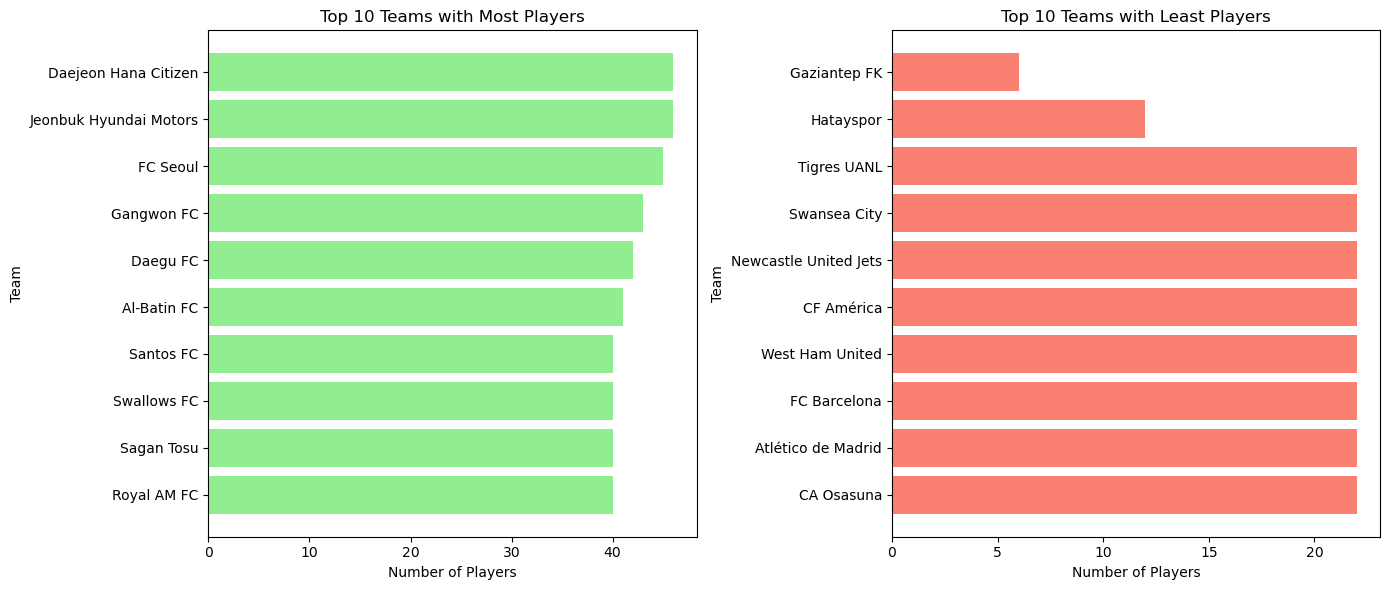

In [49]:
teams_count = players['team'].value_counts().sort_values(ascending=False)

top_10_most = teams_count.head(10).iloc[::-1] 
top_10_least = teams_count.tail(10)

# Create subplots
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Plot top 10 teams with most players
axes[0].barh(top_10_most.index, top_10_most.values, color='lightgreen')
axes[0].set_title('Top 10 Teams with Most Players')
axes[0].set_xlabel('Number of Players')
axes[0].set_ylabel('Team')

# Plot top 10 teams with least players
axes[1].barh(top_10_least.index, top_10_least.values, color='salmon')
axes[1].set_title('Top 10 Teams with Least Players')
axes[1].set_xlabel('Number of Players')
axes[1].set_ylabel('Team')

# Adjust layout
plt.tight_layout()

# Show the plots
plt.show()

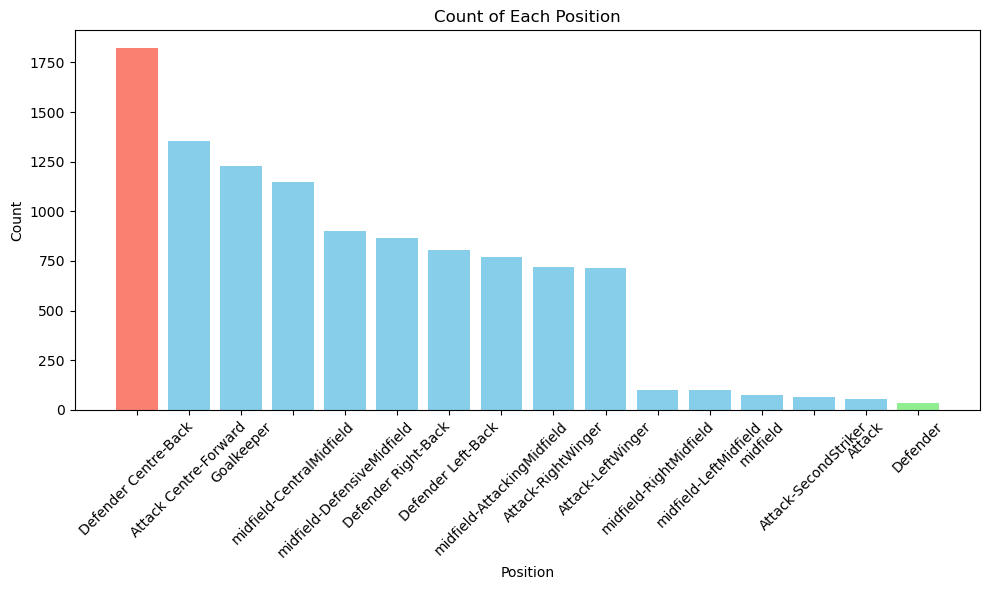

In [50]:
position_counts = players['position'].value_counts()

# Determine the positions with the most and least players
max_position = position_counts.idxmax()  # Position with the most players
min_position = position_counts.idxmin()  # Position with the least players

# Create a list of colors for each position based on its count
colors = position_counts.apply(lambda x: 'salmon' if x == position_counts.max() else 'lightgreen' if x == position_counts.min() else 'skyblue')

# Create a bar chart for the count of each position
plt.figure(figsize=(10, 6))
plt.bar(position_counts.index, position_counts.values, color=colors)

# Set the title and labels
plt.title('Count of Each Position')
plt.xlabel('Position')
plt.ylabel('Count')

# Rotate x-axis labels if needed (useful if position names are long)
plt.xticks(rotation=45)

# Show the plot
plt.tight_layout()
plt.show()

#### II. Numerical Variables:

we need to understand the central tendency and spread of the variable (Descriptive Analysis) using:
   - Box plot
   - Histogram

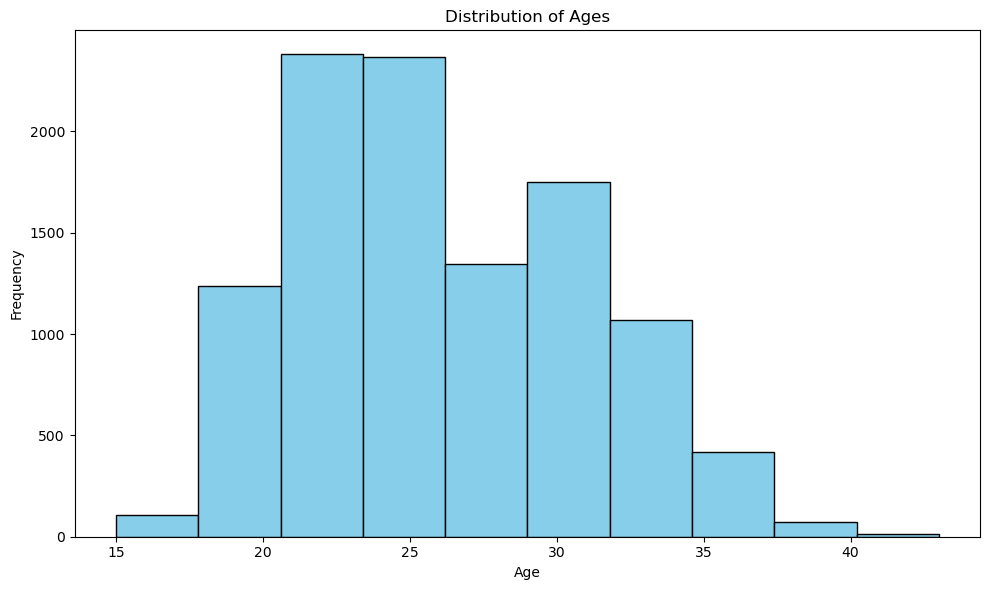

In [51]:
# We Can see some outliers here
plt.figure(figsize=(10, 6))

# Create a histogram of ages
plt.hist(players['age'], bins=10, color='skyblue', edgecolor='black')

# Set the title and labels
plt.title('Distribution of Ages')
plt.xlabel('Age')
plt.ylabel('Frequency')

# Show the plot
plt.tight_layout()
plt.show()

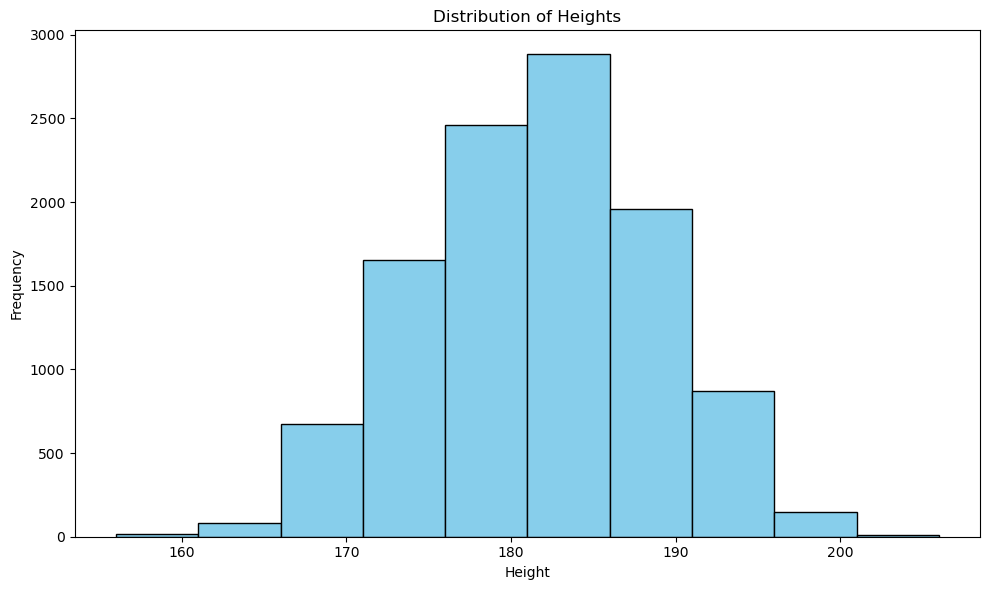

In [52]:
# We Can see some outliers here
plt.figure(figsize=(10, 6))

# Create a histogram of ages
plt.hist(players['height'], bins=10, color='skyblue', edgecolor='black')

# Set the title and labels
plt.title('Distribution of Heights')
plt.xlabel('Height')
plt.ylabel('Frequency')

# Show the plot
plt.tight_layout()
plt.show()

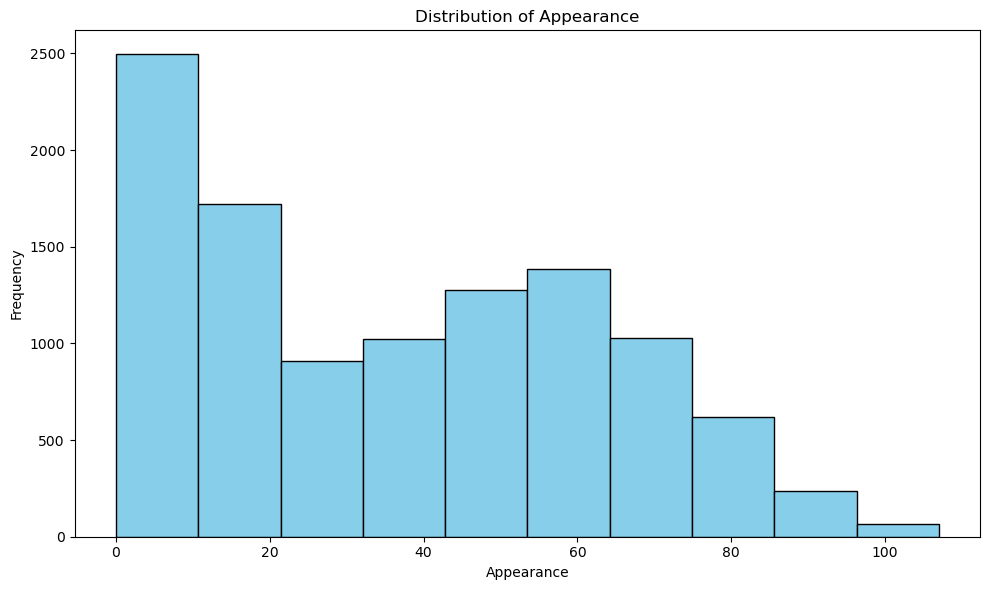

In [53]:
# We Can see some outliers here
plt.figure(figsize=(10, 6))

# Create a histogram of ages
plt.hist(players['appearance'], bins=10, color='skyblue', edgecolor='black')

# Set the title and labels
plt.title('Distribution of Appearance')
plt.xlabel('Appearance')
plt.ylabel('Frequency')

# Show the plot
plt.tight_layout()
plt.show()

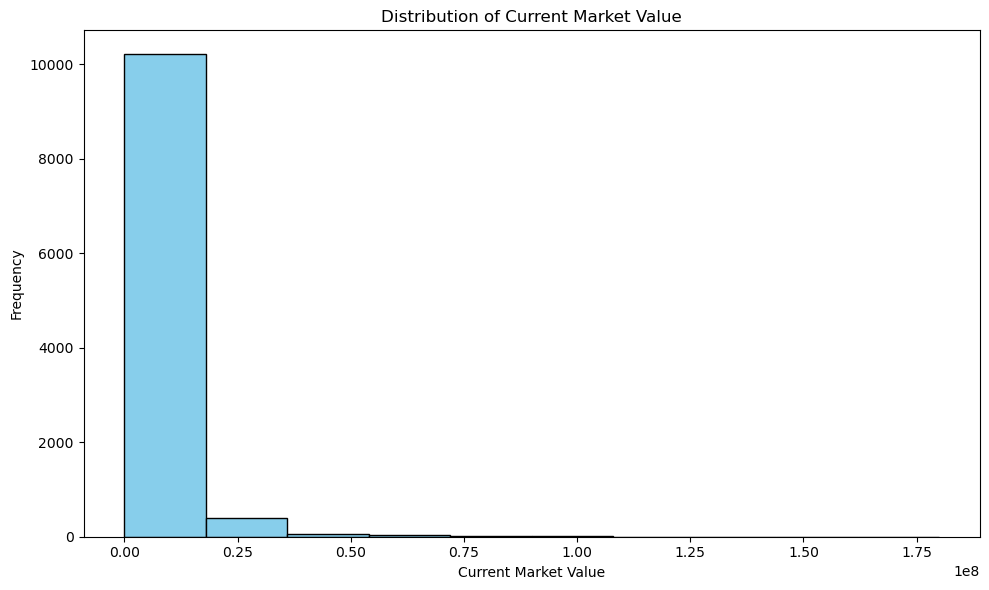

In [54]:
# We Can see some outliers here
plt.figure(figsize=(10, 6))

# Create a histogram of ages
plt.hist(players['current_value'], bins=10, color='skyblue', edgecolor='black')

# Set the title and labels
plt.title('Distribution of Current Market Value')
plt.xlabel('Current Market Value')
plt.ylabel('Frequency')

# Show the plot
plt.tight_layout()
plt.show()

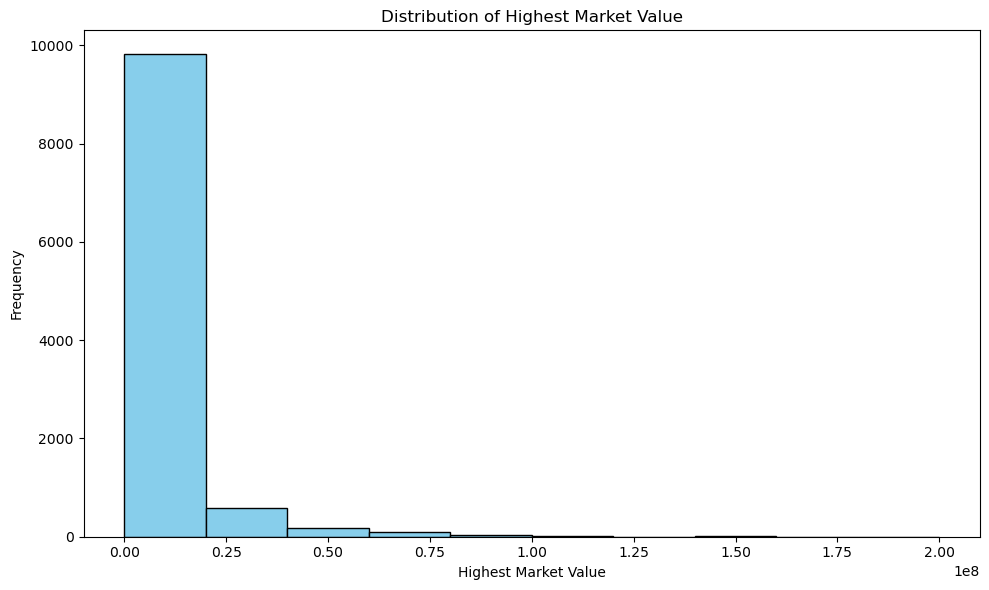

In [55]:
# We Can see some outliers here
plt.figure(figsize=(10, 6))

# Create a histogram of ages
plt.hist(players['highest_value'], bins=10, color='skyblue', edgecolor='black')

# Set the title and labels
plt.title('Distribution of Highest Market Value')
plt.xlabel('Highest Market Value')
plt.ylabel('Frequency')

# Show the plot
plt.tight_layout()
plt.show()

### 2. Univariate Non-Graphical analysis: 

- Where is the center of the data? (location) --> **Measures of central tendency**
- How much does the data vary? (scale) --> **Measure of variability**
- What is the shape of the data? (shape) --> **Measures of variation combined with an average (measure of center) gives a good picture of the distribution of the data.**

In [56]:
# It makes sense to drop these outliers
z_scores = zscore(players['age'])
outliers = np.abs(z_scores) > 3
outlier_values = players['age'][outliers]
print(outlier_values)


134      41
1126     41
1278     41
1632     42
2081     41
2571     42
3281     42
3945     42
4709     42
7596     42
7598     41
7896     42
8722     43
10512    41
Name: age, dtype: int32


In [57]:
# It makes sense to drop these outliers
z_scores = zscore(players['height'])
outliers = np.abs(z_scores) > 3
outlier_values = players['height'][outliers]
print(outlier_values)

2439     206.0
2700     206.0
3236     160.0
3770     204.0
4402     160.0
4625     160.0
5951     160.0
6725     160.0
6894     160.0
7427     160.0
7563     156.0
8085     160.0
8143     160.0
8288     159.0
8472     160.0
8647     160.0
9019     160.0
9341     160.0
10258    160.0
10612    160.0
Name: height, dtype: float64


In [58]:
#It doesn't make sense to drop 203 rows because we have a lot of zeros 
z_scores = zscore(players['current_value'])
outliers = np.abs(z_scores) > 3
outlier_values = players['current_value'][outliers]
print('The outliers of current market values falls between ', outlier_values.min(), 'and',
      outlier_values.max())

The outliers of current market values falls between  32000000.0 and 180000000.0


In [59]:
#It doesn't make sense to drop 203 rows because we have a lot of zeros 
z_scores = zscore(players['highest_value'])
outliers = np.abs(z_scores) > 3
outlier_values = players['highest_value'][outliers]
print(outlier_values)
print('The outliers of highest market values falls between ', outlier_values.min(), 'and',
      outlier_values.max())

0        70000000.0
3        50000000.0
4        80000000.0
5        70000000.0
14       80000000.0
           ...     
6328    100000000.0
6814     55000000.0
7509     75000000.0
8682     70000000.0
9433    120000000.0
Name: highest_value, Length: 239, dtype: float64
The outliers of highest market values falls between  48000000.0 and 200000000.0


In [60]:
# Calculate the IQR for 'current_value' column
Q1_current = players['current_value'].quantile(0.25)
Q3_current = players['current_value'].quantile(0.75)
IQR_current = Q3_current - Q1_current

# Calculate lower and upper bounds for 'current_value'
lower_bound_current = Q1_current - 1.5 * IQR_current
upper_bound_current = Q3_current + 1.5 * IQR_current

# Find the outliers for 'current_value'
outliers_current = players[(players['current_value'] < lower_bound_current) | (players['current_value'] > upper_bound_current)]

# Print out the outliers for 'current_value'
print(outliers_current)

                         team                    position  height  age  \
0           Manchester United                  Goalkeeper   189.0   32   
3           Manchester United        Defender Centre-Back   175.0   25   
4           Manchester United        Defender Centre-Back   191.0   30   
5           Manchester United        Defender Centre-Back   194.0   30   
6           Manchester United        Defender Centre-Back   187.0   28   
...                       ...                         ...     ...  ...   
8957  Al-Shabab Club (Riyadh)       Attack Centre-Forward   180.0   26   
9399        Al-Hilal Saudi FC           Attack-LeftWinger   166.0   27   
9418              Al-Nassr FC          Defender Left-Back   176.0   27   
9427              Al-Nassr FC  midfield-AttackingMidfield   190.0   29   
9433              Al-Nassr FC       Attack Centre-Forward   187.0   38   

      appearance     goals   assists  yellow cards  second yellow cards  \
0            104  0.000000  0.000000

In [61]:
# Calculate the IQR for 'highest_value' column
Q1_highest = players_no_outliers['highest_value'].quantile(0.25)
Q3_highest = players_no_outliers['highest_value'].quantile(0.75)
IQR_highest = Q3_highest - Q1_highest

# Calculate lower and upper bounds for 'highest_value'
lower_bound_highest = Q1_highest - 1.5 * IQR_highest
upper_bound_highest = Q3_highest + 1.5 * IQR_highest

# Find the outliers for 'highest_value'
outliers_highest = players_no_outliers[(players_no_outliers['highest_value'] < lower_bound_highest) | 
                                       (players_no_outliers['highest_value'] > upper_bound_highest)]

# Print out the outliers for 'highest_value'
print(outliers_highest)

                           team                    position  height  age  \
0             Manchester United                  Goalkeeper   189.0   32   
1             Manchester United                  Goalkeeper   196.0   30   
3             Manchester United        Defender Centre-Back   175.0   25   
4             Manchester United        Defender Centre-Back   191.0   30   
5             Manchester United        Defender Centre-Back   194.0   30   
...                         ...                         ...     ...  ...   
9428                Al-Nassr FC  midfield-AttackingMidfield   170.0   29   
9433                Al-Nassr FC       Attack Centre-Forward   187.0   38   
10453         Melbourne Victory           Attack-LeftWinger   177.0   36   
10685                 Sydney FC  midfield-DefensiveMidfield   188.0   32   
10736  Western Sydney Wanderers  midfield-DefensiveMidfield   186.0   33   

       appearance     goals   assists  yellow cards  second yellow cards  \
0          

## 4. Bivariate/Multivariate Analysis:


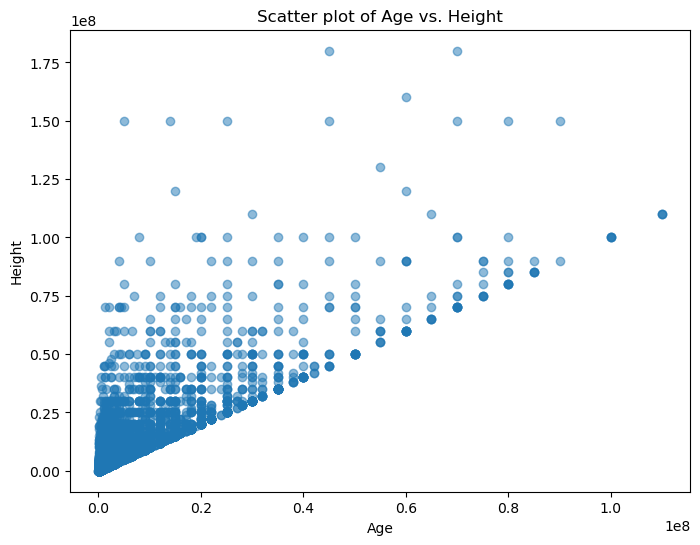

In [62]:
plt.figure(figsize=(8, 6))
plt.scatter(players_no_outliers['current_value'], players_no_outliers['highest_value'], alpha=0.5)
plt.title('Scatter plot of Age vs. Height')
plt.xlabel('Age')
plt.ylabel('Height')
plt.show()

# Supervised Machine Learning Models

## Linear Regression

### With teams and positions encoded

In [63]:
# Initiliazing the model
linear_regression = LinearRegression()

In [64]:
# With encoded teams and encoded positions
#Features (independet variable)
X = players_encoded.drop(columns=['current_value'])
#Target (dependent variable)
y = players_encoded['current_value']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [65]:
# Removing highly correlated features 
corr_matrix = X_train.corr()
upper_triangle = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
to_drop = [column for column in upper_triangle.columns if any(upper_triangle[column] >= 0.85)]
X_train_selected = X_train.drop(columns=to_drop)
X_test_selected = X_test.drop(columns=to_drop)

In [66]:
to_drop

['minutes played', 'games_injured']

In [67]:
#scaler = StandardScaler()
#X_train_scaled = scaler.fit_transform(X_train_selected)
#X_test_scaled = scaler.transform(X_test_selected)# Use K-Fold Cross Validation (5 folds here, you can change it)
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Evaluate the model using cross-validation (Negative MSE because sklearn minimizes loss)
mse_scores = cross_val_score(linear_regression, X_train, y_train, cv=kf, scoring='neg_mean_squared_error')
mae_scores = cross_val_score(linear_regression, X_train, y_train, cv=kf, scoring='neg_mean_absolute_error')
r2_scores = cross_val_score(linear_regression, X_train, y_train, cv=kf, scoring='r2')

# Convert Negative MSE to Positive RMSE
rmse_scores = np.sqrt(-mse_scores)

# Print the Evaluation Metrics
print(f"Mean MSE: {np.mean(mse_scores):.4f}")
print(f"Mean RMSE: {np.mean(rmse_scores):.4f}")
print(f"Mean MAE: {np.mean(-mae_scores):.4f}")
print(f"Mean R²: {np.mean(r2_scores):.4f}")

# Fit Model on Entire Training Data After Cross-Validation
linear_regression.fit(X_train, y_train)

# Evaluate on Test Set
y_pred = linear_regression.predict(X_test)
print(f"Mean MSE:  {mean_squared_error(y_test, y_pred):.4f}")
print(f"Test Set RMSE: {np.sqrt(mean_squared_error(y_test, y_pred)):.4f}")
print(f"Test Set MAE: {mean_absolute_error(y_test, y_pred):.4f}")
print(f"Test Set R²: {r2_score(y_test, y_pred):.4f}")

Mean MSE: -17539266783627.8555
Mean RMSE: 4170242.6694
Mean MAE: 2198238.3575
Mean R²: 0.7621
Mean MSE:  20294001389290.8555
Test Set RMSE: 4504886.3903
Test Set MAE: 2320474.2579
Test Set R²: 0.7434


### Without teams 

In [68]:
#Features (independet variable)
X = players_no_team_encoded.drop(columns=['current_value'])
#Target (dependent variable)
y = players_no_team_encoded['current_value']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [69]:
# Removing highly correlated features 
upper_triangle = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
to_drop = [column for column in upper_triangle.columns if any(upper_triangle[column] > 0.85)]
X_train_selected = X_train.drop(columns=to_drop)
X_test_selected = X_test.drop(columns=to_drop)

In [70]:
to_drop

['minutes played', 'games_injured']

In [71]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_selected)
X_test_scaled = scaler.transform(X_test_selected)# Use K-Fold Cross Validation (5 folds here, you can change it)
kf = KFold(n_splits=5, shuffle=True, random_state=42)


In [72]:
# Evaluate the model using cross-validation (Negative MSE because sklearn minimizes loss)
mse_scores = cross_val_score(linear_regression, X_train, y_train, cv=kf, scoring='neg_mean_squared_error')
mae_scores = cross_val_score(linear_regression, X_train, y_train, cv=kf, scoring='neg_mean_absolute_error')

r2_scores = cross_val_score(linear_regression, X_train, y_train, cv=kf, scoring='r2')

# Convert Negative MSE to Positive RMSE
rmse_scores = np.sqrt(-mse_scores)

# Print the Evaluation Metrics
print(f"Mean RMSE: {np.mean(rmse_scores):.4f}")
print(f"Mean MAE: {np.mean(-mae_scores):.4f}")
print(f"Mean R²: {np.mean(r2_scores):.4f}")

# Fit Model on Entire Training Data After Cross-Validation
linear_regression.fit(X_train, y_train)

# Evaluate on Test Set
y_pred = linear_regression.predict(X_test)
print(f"Test Set RMSE: {mean_squared_error(y_test, y_pred):.4f}")
print(f"Test Set MAE: {mean_absolute_error(y_test, y_pred):.4f}")
print(f"Test Set R²: {r2_score(y_test, y_pred):.4f}")

Mean RMSE: 4314987.9628
Mean MAE: 2168799.4045
Mean R²: 0.7458
Test Set RMSE: 22338232936326.2852
Test Set MAE: 2321365.1165
Test Set R²: 0.7176


## Lasso Regression

In [214]:
# Initiliazing the model
lasso = Lasso(alpha=1.0, max_iter=100)

### With teams and positions

In [ ]:
#Features (independet variable)
X = players_encoded.drop(columns=['current_value'])
#Target (dependent variable)
y = players_encoded['current_value']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [105]:
lasso.fit(X_train, y_train)

C:\Users\sakur\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.520e+16, tolerance: 6.235e+13
  model = cd_fast.enet_coordinate_descent(


Lasso(max_iter=100)

In [106]:
mse_scores = cross_val_score(lasso, X_train, y_train, cv=kf, scoring='neg_mean_squared_error')

C:\Users\sakur\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.506e+16, tolerance: 5.314e+13
  model = cd_fast.enet_coordinate_descent(
C:\Users\sakur\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.321e+16, tolerance: 4.891e+13
  model = cd_fast.enet_coordinate_descent(
C:\Users\sakur\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.112e+16, toleranc

In [107]:
# Evaluate the model using cross-validation (Negative MSE because sklearn minimizes loss)
mae_scores = cross_val_score(lasso, X_train, y_train, cv=kf, scoring='neg_mean_absolute_error')

r2_scores = cross_val_score(lasso, X_train, y_train, cv=kf, scoring='r2')

# Convert Negative MSE to Positive RMSE
rmse_scores = np.sqrt(-mse_scores)

C:\Users\sakur\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.506e+16, tolerance: 5.314e+13
  model = cd_fast.enet_coordinate_descent(
C:\Users\sakur\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.321e+16, tolerance: 4.891e+13
  model = cd_fast.enet_coordinate_descent(
C:\Users\sakur\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.112e+16, toleranc

In [108]:
# Print the Evaluation Metrics
print(f"Mean MSE: {np.mean(mse_scores):.4f}")
print(f"Mean RMSE: {np.mean(rmse_scores):.4f}")
print(f"Mean MAE: {np.mean(-mae_scores):.4f}")
print(f"Mean R²: {np.mean(r2_scores):.4f}")

print(f"Test Set MSE: {mean_squared_error(y_test, y_pred):.4f}")
print(f"Test Set RMSE: {root_mean_squared_error(y_test, y_pred):.4f}")
print(f"Test Set MAE: {mean_absolute_error(y_test, y_pred):.4f}")
print(f"Test Set R²: {r2_score(y_test, y_pred):.4f}")

Mean MSE: -17539071196517.1621
Mean RMSE: 4170218.5572
Mean MAE: 2198135.0972
Mean R²: 0.7621
Test Set MSE: 22338254218533.5859
Test Set RMSE: 4726336.2363
Test Set MAE: 2321348.3104
Test Set R²: 0.7176


### Without teams

In [109]:
#Features (independet variable)
X = players_no_team_encoded.drop(columns=['current_value'])
#Target (dependent variable)
y = players_no_team_encoded['current_value']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [110]:
lasso.fit(X_train, y_train)

C:\Users\sakur\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.799e+16, tolerance: 6.235e+13
  model = cd_fast.enet_coordinate_descent(


Lasso(max_iter=100)

In [111]:
mse_scores = cross_val_score(lasso, X_train, y_train, cv=kf, scoring='neg_mean_squared_error')

C:\Users\sakur\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.690e+16, tolerance: 5.314e+13
  model = cd_fast.enet_coordinate_descent(
C:\Users\sakur\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.413e+16, tolerance: 4.891e+13
  model = cd_fast.enet_coordinate_descent(
C:\Users\sakur\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.269e+16, toleranc

In [112]:
# Evaluate the model using cross-validation (Negative MSE because sklearn minimizes loss)
mae_scores = cross_val_score(lasso, X_train, y_train, cv=kf, scoring='neg_mean_absolute_error')

r2_scores = cross_val_score(lasso, X_train, y_train, cv=kf, scoring='r2')

# Convert Negative MSE to Positive RMSE
rmse_scores = np.sqrt(-mse_scores)

C:\Users\sakur\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.690e+16, tolerance: 5.314e+13
  model = cd_fast.enet_coordinate_descent(
C:\Users\sakur\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.413e+16, tolerance: 4.891e+13
  model = cd_fast.enet_coordinate_descent(
C:\Users\sakur\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.269e+16, toleranc

In [113]:
# Print the Evaluation Metrics
print(f"Mean MSE: {np.mean(mse_scores):.4f}")
print(f"Mean RMSE: {np.mean(rmse_scores):.4f}")
print(f"Mean MAE: {np.mean(-mae_scores):.4f}")
print(f"Mean R²: {np.mean(r2_scores):.4f}")

print(f"Test Set MSE: {mean_squared_error(y_test, y_pred):.4f}")
print(f"Test Set RMSE: {root_mean_squared_error(y_test, y_pred):.4f}")
print(f"Test Set MAE: {mean_absolute_error(y_test, y_pred):.4f}")
print(f"Test Set R²: {r2_score(y_test, y_pred):.4f}")

Mean MSE: -18827007465206.4492
Mean RMSE: 4314984.8653
Mean MAE: 2168780.2354
Mean R²: 0.7458
Test Set MSE: 22338254218533.5859
Test Set RMSE: 4726336.2363
Test Set MAE: 2321348.3104
Test Set R²: 0.7176


## Ridge Regression

In [115]:
# Initializing the  model
ridge = Ridge(alpha=1.0)

### With teams and positions

In [116]:
#Features (independet variable)
X = players_encoded.drop(columns=['current_value'])
#Target (dependent variable)
y = players_encoded['current_value']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [117]:
ridge.fit(X_train, y_train)

C:\Users\sakur\anaconda3\Lib\site-packages\sklearn\linear_model\_ridge.py:215: LinAlgWarning: Ill-conditioned matrix (rcond=6.25086e-19): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


Ridge()

In [118]:
y_pred = ridge.predict(X_test)

In [119]:
y_pred

array([ 2152863.17973511,  3194867.55758663,  2748658.63357286, ...,
         982972.78046502, 12300797.31172626, 27610027.37998644])

In [120]:
# Evaluate the model using cross-validation (Negative MSE because sklearn minimizes loss)
mse_scores = cross_val_score(ridge, X_train, y_train, cv=kf, scoring='neg_mean_squared_error')
mae_scores = cross_val_score(ridge, X_train, y_train, cv=kf, scoring='neg_mean_absolute_error')

r2_scores = cross_val_score(ridge, X_train, y_train, cv=kf, scoring='r2')

# Convert Negative MSE to Positive RMSE
rmse_scores = np.sqrt(-mse_scores)

# Print the Evaluation Metrics
print(f"Mean MSE: {np.mean(mse_scores):.4f}")
print(f"Mean RMSE: {np.mean(rmse_scores):.4f}")
print(f"Mean MAE: {np.mean(-mae_scores):.4f}")
print(f"Mean R²: {np.mean(r2_scores):.4f}")

print(f"Test Set MSE: {mean_squared_error(y_test, y_pred):.4f}")
print(f"Test Set RMSE: {root_mean_squared_error(y_test, y_pred):.4f}")
print(f"Test Set MAE: {mean_absolute_error(y_test, y_pred):.4f}")
print(f"Test Set R²: {r2_score(y_test, y_pred):.4f}")

C:\Users\sakur\anaconda3\Lib\site-packages\sklearn\linear_model\_ridge.py:215: LinAlgWarning: Ill-conditioned matrix (rcond=7.66933e-19): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
C:\Users\sakur\anaconda3\Lib\site-packages\sklearn\linear_model\_ridge.py:215: LinAlgWarning: Ill-conditioned matrix (rcond=7.89668e-19): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
C:\Users\sakur\anaconda3\Lib\site-packages\sklearn\linear_model\_ridge.py:215: LinAlgWarning: Ill-conditioned matrix (rcond=7.89265e-19): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
C:\Users\sakur\anaconda3\Lib\site-packages\sklearn\linear_model\_ridge.py:215: LinAlgWarning: Ill-conditioned matrix (rcond=8.5435e-19): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
C:\Users\sakur\anaconda3\Lib\site-packages\sklearn\linear_model\_ridge.py:215

Mean MSE: -17437640215121.0254
Mean RMSE: 4157761.5482
Mean MAE: 2178834.7266
Mean R²: 0.7635
Test Set MSE: 20242839430172.4180
Test Set RMSE: 4499204.3108
Test Set MAE: 2305030.7489
Test Set R²: 0.7440


C:\Users\sakur\anaconda3\Lib\site-packages\sklearn\linear_model\_ridge.py:215: LinAlgWarning: Ill-conditioned matrix (rcond=7.89265e-19): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
C:\Users\sakur\anaconda3\Lib\site-packages\sklearn\linear_model\_ridge.py:215: LinAlgWarning: Ill-conditioned matrix (rcond=8.5435e-19): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
C:\Users\sakur\anaconda3\Lib\site-packages\sklearn\linear_model\_ridge.py:215: LinAlgWarning: Ill-conditioned matrix (rcond=7.88221e-19): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


### Without teams

In [121]:
#Features (independet variable)
X = players_no_team_encoded.drop(columns=['current_value'])
#Target (dependent variable)
y = players_no_team_encoded['current_value']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [122]:
ridge.fit(X_train, y_train)

C:\Users\sakur\anaconda3\Lib\site-packages\sklearn\linear_model\_ridge.py:215: LinAlgWarning: Ill-conditioned matrix (rcond=6.62175e-19): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


Ridge()

In [123]:
y_pred = ridge.predict(X_test)

In [124]:
y_pred

array([ 1350818.90756755,  2913524.72590413,  2250412.07741763, ...,
        1496979.20336526, 11707444.03435582, 31986166.04483875])

In [125]:
# Evaluate the model using cross-validation (Negative MSE because sklearn minimizes loss)
mse_scores = cross_val_score(ridge, X_train, y_train, cv=kf, scoring='neg_mean_squared_error')
mae_scores = cross_val_score(ridge, X_train, y_train, cv=kf, scoring='neg_mean_absolute_error')

r2_scores = cross_val_score(ridge, X_train, y_train, cv=kf, scoring='r2')

# Convert Negative MSE to Positive RMSE
rmse_scores = np.sqrt(-mse_scores)

# Print the Evaluation Metrics
print(f"Mean MSE: {np.mean(mse_scores):.4f}")
print(f"Mean RMSE: {np.mean(rmse_scores):.4f}")
print(f"Mean MAE: {np.mean(-mae_scores):.4f}")
print(f"Mean R²: {np.mean(r2_scores):.4f}")

print(f"Test Set MSE: {mean_squared_error(y_test, y_pred):.4f}")
print(f"Test Set RMSE: {root_mean_squared_error(y_test, y_pred):.4f}")
print(f"Test Set MAE: {mean_absolute_error(y_test, y_pred):.4f}")
print(f"Test Set R²: {r2_score(y_test, y_pred):.4f}")

Mean MSE: -18825371429268.8984
Mean RMSE: 4314801.7669
Mean MAE: 2168447.8836
Mean R²: 0.7458
Test Set MSE: 22337585596154.5352
Test Set RMSE: 4726265.5021
Test Set MAE: 2321275.4139
Test Set R²: 0.7176


C:\Users\sakur\anaconda3\Lib\site-packages\sklearn\linear_model\_ridge.py:215: LinAlgWarning: Ill-conditioned matrix (rcond=7.96992e-19): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
C:\Users\sakur\anaconda3\Lib\site-packages\sklearn\linear_model\_ridge.py:215: LinAlgWarning: Ill-conditioned matrix (rcond=8.21116e-19): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
C:\Users\sakur\anaconda3\Lib\site-packages\sklearn\linear_model\_ridge.py:215: LinAlgWarning: Ill-conditioned matrix (rcond=8.18123e-19): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
C:\Users\sakur\anaconda3\Lib\site-packages\sklearn\linear_model\_ridge.py:215: LinAlgWarning: Ill-conditioned matrix (rcond=8.86861e-19): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
C:\Users\sakur\anaconda3\Lib\site-packages\sklearn\linear_model\_ridge.py:21

## Logistic Regression

In [172]:
# Initiliazing the model
log_reg = LogisticRegression()

### With teams and positions

In [305]:
#Features (independet variable)
X = players_encoded.drop(columns=['current_value_category_encoded'])
#Target (dependent variable)
y = players_encoded['current_value_category_encoded']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [306]:
log_reg.fit(X_train, y_train)

C:\Users\sakur\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [307]:
y_pred = log_reg.predict(X_test)

In [308]:
y_pred

array([2, 2, 2, ..., 2, 0, 0])

In [309]:
y_pred_test = log_reg.predict(X_test)

#### Evaluating the model

In [310]:
y_pred_train = log_reg.predict(X_train)
accuracy_Train = accuracy_score(y_train, y_pred_train)
accuracy_Train

0.6188107083629472

1. Accuracy 

In [311]:
accuracy_test = accuracy_score(y_test, y_pred_test)
accuracy_test

0.6215063950734249

2. Confiusion Matrix

In [293]:
conf_matrix = confusion_matrix(y_test, y_pred_test)
conf_matrix

array([[405,   0, 142],
       [  5,   0, 489],
       [ 76,   0, 994]], dtype=int64)

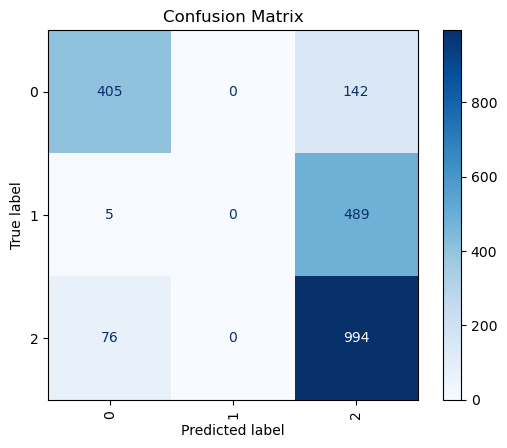

In [294]:
ConfusionMatrixDisplay.from_predictions(y_test, y_pred_test,
                                        display_labels=log_reg.classes_,
                                        cmap="Blues",
                                        xticks_rotation='vertical')
plt.title('Confusion Matrix')
plt.show()

3. Precision

In [295]:
precision_train = precision_score(y_train, y_pred_train, average='macro')
print(f"Precision in train: {precision_train:.2f}")

# Test score
precision_test = precision_score(y_test, y_pred_test, average='macro')
print(f"Precision in test: {precision_test:.2f}")

Precision in train: 0.81
Precision in test: 0.48


C:\Users\sakur\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


4. Recall

In [296]:
# Train score
recall_train = recall_score(y_train, y_pred_train, average='macro')
print(f"Recall in train: {recall_train:.2f}")

# Test score
recall_test = recall_score(y_test, y_pred_test, average='macro')
print(f"Recall in test: {recall_test:.2f}")

Recall in train: 0.54
Recall in test: 0.56


5. F1-Score

In [297]:
# Train score
f1_train = f1_score(y_train, y_pred_train, average='macro')
print(f"f1-score in train: {f1_train:.2f}")

# Test score
f1_test = precision_score(y_test, y_pred_test, average='macro')
print(f"f1-score in test: {f1_test:.2f}")

f1-score in train: 0.50
f1-score in test: 0.48


C:\Users\sakur\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


5. Classification Report

In [298]:
from sklearn.metrics import classification_report

print('Train report: ')
print(classification_report(y_train, y_pred_train))

print('Test report: ')
print(classification_report(y_test, y_pred_test))

Train report: 
              precision    recall  f1-score   support

           0       0.81      0.69      0.75      2127
           1       1.00      0.00      0.00      1914
           2       0.61      0.93      0.74      4401

    accuracy                           0.66      8442
   macro avg       0.81      0.54      0.50      8442
weighted avg       0.75      0.66      0.57      8442

Test report: 
              precision    recall  f1-score   support

           0       0.83      0.74      0.78       547
           1       0.00      0.00      0.00       494
           2       0.61      0.93      0.74      1070

    accuracy                           0.66      2111
   macro avg       0.48      0.56      0.51      2111
weighted avg       0.53      0.66      0.58      2111



C:\Users\sakur\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\sakur\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\sakur\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


### Without teams

In [421]:
#Features (independet variable)
X = players_no_team_encoded.drop(columns=['current_value_category_encoded'])
#Target (dependent variable)
y = players_no_team_encoded['current_value_category_encoded']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [422]:
log_reg.fit(X_train, y_train)

C:\Users\sakur\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [423]:
y_pred = log_reg.predict(X_test)

In [424]:
y_pred

array([2, 2, 2, ..., 2, 0, 0])

In [425]:
y_pred_test = log_reg.predict(X_test)

#### Evaluating the model

In [426]:
y_pred_train = log_reg.predict(X_train)
accuracy_Train = accuracy_score(y_train, y_pred_train)
accuracy_Train

0.6564795072257759

1. Accuracy 

In [427]:
accuracy_test = accuracy_score(y_test, y_pred_test)
accuracy_test

0.6598768356229275

2. Confiusion Matrix

In [428]:
conf_matrix = confusion_matrix(y_test, y_pred_test)
conf_matrix

array([[401,   0, 146],
       [  5,   0, 489],
       [ 78,   0, 992]], dtype=int64)

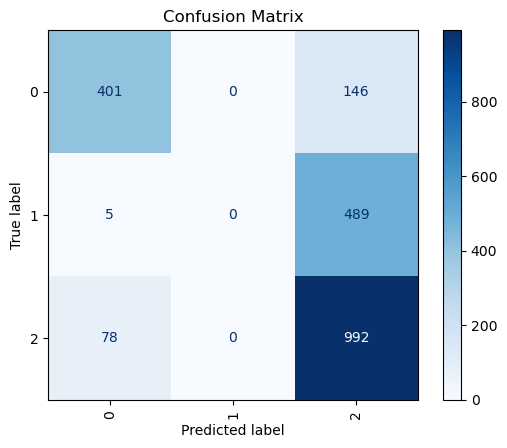

In [429]:
ConfusionMatrixDisplay.from_predictions(y_test, y_pred_test,
                                        display_labels=log_reg.classes_,
                                        cmap="Blues",
                                        xticks_rotation='vertical')
plt.title('Confusion Matrix')
plt.show()

3. Precision

In [430]:
precision_train = precision_score(y_train, y_pred_train, average='macro')
print(f"Precision in train: {precision_train:.2f}")

# Test score
precision_test = precision_score(y_test, y_pred_test, average='macro')
print(f"Precision in test: {precision_test:.2f}")

Precision in train: 0.48
Precision in test: 0.48


C:\Users\sakur\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\sakur\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


4. Recall

In [431]:
# Train score
recall_train = recall_score(y_train, y_pred_train, average='macro')
print(f"Recall in train: {recall_train:.2f}")

# Test score
recall_test = recall_score(y_test, y_pred_test, average='macro')
print(f"Recall in test: {recall_test:.2f}")

Recall in train: 0.54
Recall in test: 0.55


5. F1-Score

In [432]:
# Train score
f1_train = f1_score(y_train, y_pred_train, average='macro')
print(f"f1-score in train: {f1_train:.2f}")

# Test score
f1_test = precision_score(y_test, y_pred_test, average='macro')
print(f"f1-score in test: {f1_test:.2f}")

f1-score in train: 0.49
f1-score in test: 0.48


C:\Users\sakur\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


5. Classification Report

In [433]:
from sklearn.metrics import classification_report

print('Train report: ')
print(classification_report(y_train, y_pred_train))

print('Test report: ')
print(classification_report(y_test, y_pred_test))

Train report: 
              precision    recall  f1-score   support

           0       0.81      0.69      0.75      2127
           1       0.00      0.00      0.00      1914
           2       0.61      0.93      0.74      4401

    accuracy                           0.66      8442
   macro avg       0.48      0.54      0.49      8442
weighted avg       0.52      0.66      0.57      8442

Test report: 
              precision    recall  f1-score   support

           0       0.83      0.73      0.78       547
           1       0.00      0.00      0.00       494
           2       0.61      0.93      0.74      1070

    accuracy                           0.66      2111
   macro avg       0.48      0.55      0.50      2111
weighted avg       0.52      0.66      0.57      2111



C:\Users\sakur\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\sakur\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\sakur\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\sakur\anaconda3\Lib\site-packag

## Decision Tree

In [520]:
# Initilizing the model
dt_classifier = DecisionTreeClassifier()

### With teams and positions

In [521]:
#Features (independet variable)
X = players_encoded.drop(columns=['current_value_category_encoded', 'current_value_category'])
#Target (dependent variable)
y = players_encoded['current_value_category_encoded']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [522]:
dt_classifier.fit(X_train, y_train)

DecisionTreeClassifier()

In [523]:
y_pred = dt_classifier.predict(X_test)

In [524]:
y_pred

array([1, 2, 2, ..., 2, 0, 0])

In [525]:
y_pred_test = dt_classifier.predict(X_test)

#### Evaluating the model

In [526]:
y_pred_train = dt_classifier.predict(X_train)
accuracy_Train = accuracy_score(y_train, y_pred_train)
accuracy_Train

1.0

1. Accuracy 

In [527]:
accuracy_test = accuracy_score(y_test, y_pred_test)
accuracy_test

0.8536238749407864

2. Confiusion Matrix

In [457]:
conf_matrix = confusion_matrix(y_test, y_pred_test)
conf_matrix

array([[465,   1,  81],
       [  1, 413,  80],
       [ 80,  67, 923]], dtype=int64)

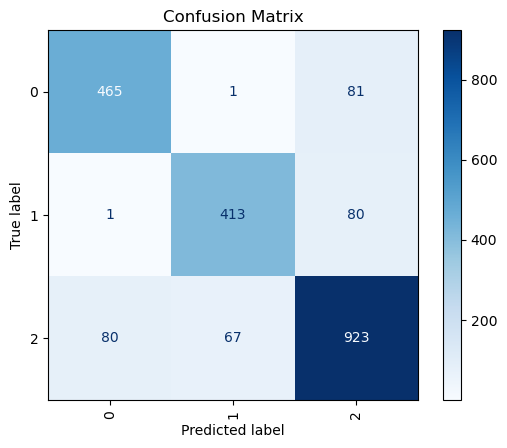

In [459]:
ConfusionMatrixDisplay.from_predictions(y_test, y_pred_test,
                                        display_labels=dt_classifier.classes_,
                                        cmap="Blues",
                                        xticks_rotation='vertical')
plt.title('Confusion Matrix')
plt.show()

3. Precision

In [460]:
precision_train = precision_score(y_train, y_pred_train, average='macro')
print(f"Precision in train: {precision_train:.2f}")

# Test score
precision_test = precision_score(y_test, y_pred_test, average='macro')
print(f"Precision in test: {precision_test:.2f}")

Precision in train: 1.00
Precision in test: 0.85


4. Recall

In [461]:
# Train score
recall_train = recall_score(y_train, y_pred_train, average='macro')
print(f"Recall in train: {recall_train:.2f}")

# Test score
recall_test = recall_score(y_test, y_pred_test, average='macro')
print(f"Recall in test: {recall_test:.2f}")

Recall in train: 1.00
Recall in test: 0.85


5. F1-Score

In [462]:
# Train score
f1_train = f1_score(y_train, y_pred_train, average='macro')
print(f"f1-score in train: {f1_train:.2f}")

# Test score
f1_test = precision_score(y_test, y_pred_test, average='macro')
print(f"f1-score in test: {f1_test:.2f}")

f1-score in train: 1.00
f1-score in test: 0.85


5. Classification Report

In [463]:
from sklearn.metrics import classification_report

print('Train report: ')
print(classification_report(y_train, y_pred_train))

print('Test report: ')
print(classification_report(y_test, y_pred_test))

Train report: 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2127
           1       1.00      1.00      1.00      1914
           2       1.00      1.00      1.00      4401

    accuracy                           1.00      8442
   macro avg       1.00      1.00      1.00      8442
weighted avg       1.00      1.00      1.00      8442

Test report: 
              precision    recall  f1-score   support

           0       0.85      0.85      0.85       547
           1       0.86      0.84      0.85       494
           2       0.85      0.86      0.86      1070

    accuracy                           0.85      2111
   macro avg       0.85      0.85      0.85      2111
weighted avg       0.85      0.85      0.85      2111



### Without teams

In [466]:
#Features (independet variable)
X = players_no_team_encoded.drop(columns=['current_value_category_encoded'])
#Target (dependent variable)
y = players_no_team_encoded['current_value_category_encoded']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [472]:
dt_classifier.fit(X_train, y_train)

DecisionTreeClassifier()

In [473]:
y_pred = dt_classifier.predict(X_test)

In [474]:
y_pred

array([1, 2, 2, ..., 2, 2, 0])

In [475]:
y_pred_test = dt_classifier.predict(X_test)

#### Evaluating the model

In [476]:
y_pred_train = dt_classifier.predict(X_train)
accuracy_Train = accuracy_score(y_train, y_pred_train)
accuracy_Train

1.0

1. Accuracy 

In [477]:
accuracy_test = accuracy_score(y_test, y_pred_test)
accuracy_test

0.8446234012316438

2. Confiusion Matrix

In [478]:
conf_matrix = confusion_matrix(y_test, y_pred_test)
conf_matrix

array([[466,   1,  80],
       [  2, 410,  82],
       [ 75,  88, 907]], dtype=int64)

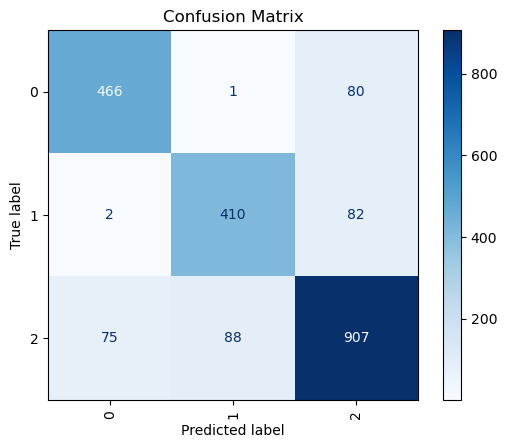

In [479]:
ConfusionMatrixDisplay.from_predictions(y_test, y_pred_test,
                                        display_labels=dt_classifier.classes_,
                                        cmap="Blues",
                                        xticks_rotation='vertical')
plt.title('Confusion Matrix')
plt.show()

3. Precision

In [480]:
precision_train = precision_score(y_train, y_pred_train, average='macro')
print(f"Precision in train: {precision_train:.2f}")

# Test score
precision_test = precision_score(y_test, y_pred_test, average='macro')
print(f"Precision in test: {precision_test:.2f}")

Precision in train: 1.00
Precision in test: 0.84


4. Recall

In [481]:
# Train score
recall_train = recall_score(y_train, y_pred_train, average='macro')
print(f"Recall in train: {recall_train:.2f}")

# Test score
recall_test = recall_score(y_test, y_pred_test, average='macro')
print(f"Recall in test: {recall_test:.2f}")

Recall in train: 1.00
Recall in test: 0.84


5. F1-Score

In [482]:
# Train score
f1_train = f1_score(y_train, y_pred_train, average='macro')
print(f"f1-score in train: {f1_train:.2f}")

# Test score
f1_test = precision_score(y_test, y_pred_test, average='macro')
print(f"f1-score in test: {f1_test:.2f}")

f1-score in train: 1.00
f1-score in test: 0.84


5. Classification Report

In [483]:
from sklearn.metrics import classification_report

print('Train report: ')
print(classification_report(y_train, y_pred_train))

print('Test report: ')
print(classification_report(y_test, y_pred_test))

Train report: 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2127
           1       1.00      1.00      1.00      1914
           2       1.00      1.00      1.00      4401

    accuracy                           1.00      8442
   macro avg       1.00      1.00      1.00      8442
weighted avg       1.00      1.00      1.00      8442

Test report: 
              precision    recall  f1-score   support

           0       0.86      0.85      0.86       547
           1       0.82      0.83      0.83       494
           2       0.85      0.85      0.85      1070

    accuracy                           0.84      2111
   macro avg       0.84      0.84      0.84      2111
weighted avg       0.84      0.84      0.84      2111



## Random Forest Model

In [697]:
rf_classifier = RandomForestClassifier(max_depth=8, n_estimators=33)

In [539]:
param_grid = {
    'max_depth': [4, 5, 6, 7, 8],   # adjust tree depth
    'n_estimators':[35, 40, 50, 60]      # adjust num trees to build before taking the maximum voting or averages of predictions
}
grid_search = GridSearchCV(estimator=dt_classifier,
                           param_grid=param_grid,
                           cv=5,
                           scoring='f1_macro', 
                           verbose=1)

### With teams and positions

In [689]:
#Features (independet variable)
X = players_encoded.drop(columns=['current_value_category_encoded', 'current_value_category'])
#Target (dependent variable)
y = players_encoded['current_value_category_encoded']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [690]:
X.columns

Index(['height', 'age', 'appearance', 'goals', 'assists', 'red cards',
       'goals conceded', 'clean sheets', 'minutes played', 'days_injured',
       ...
       'position_Defender Left-Back', 'position_Defender Right-Back',
       'position_Goalkeeper', 'position_midfield',
       'position_midfield-AttackingMidfield',
       'position_midfield-CentralMidfield',
       'position_midfield-DefensiveMidfield', 'position_midfield-LeftMidfield',
       'position_midfield-RightMidfield', 'total_yellow_cards'],
      dtype='object', length=405)

In [698]:
rf_classifier.fit(X_train, y_train)

RandomForestClassifier(max_depth=8, n_estimators=33)

In [699]:
y_pred = rf_classifier.predict(X_test)

In [700]:
y_pred

array([1, 2, 2, ..., 2, 2, 0])

In [701]:
y_pred_test = dt_classifier.predict(X_test)

#### Evaluating the model

In [702]:
y_pred_train = rf_classifier.predict(X_train)
accuracy_Train = accuracy_score(y_train, y_pred_train)
accuracy_Train

0.7809760720208482

1. Accuracy 

In [703]:
accuracy_test = accuracy_score(y_test, y_pred_test)
accuracy_test

0.8536238749407864

2. Confiusion Matrix

In [704]:
conf_matrix = confusion_matrix(y_test, y_pred_test)
conf_matrix

array([[468,   0,  79],
       [  1, 414,  79],
       [ 81,  69, 920]], dtype=int64)

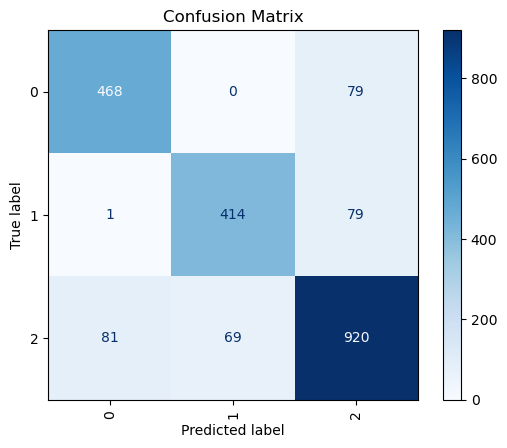

In [705]:
ConfusionMatrixDisplay.from_predictions(y_test, y_pred_test,
                                        display_labels=dt_classifier.classes_,
                                        cmap="Blues",
                                        xticks_rotation='vertical')
plt.title('Confusion Matrix')
plt.show()

3. Precision

In [706]:
precision_train = precision_score(y_train, y_pred_train, average='macro')
print(f"Precision in train: {precision_train:.2f}")

# Test score
precision_test = precision_score(y_test, y_pred_test, average='macro')
print(f"Precision in test: {precision_test:.2f}")

Precision in train: 0.88
Precision in test: 0.85


4. Recall

In [707]:
# Train score
recall_train = recall_score(y_train, y_pred_train, average='macro')
print(f"Recall in train: {recall_train:.2f}")

# Test score
recall_test = recall_score(y_test, y_pred_test, average='macro')
print(f"Recall in test: {recall_test:.2f}")

Recall in train: 0.71
Recall in test: 0.85


5. F1-Score

In [708]:
# Train score
f1_train = f1_score(y_train, y_pred_train, average='macro')
print(f"f1-score in train: {f1_train:.2f}")

# Test score
f1_test = precision_score(y_test, y_pred_test, average='macro')
print(f"f1-score in test: {f1_test:.2f}")

f1-score in train: 0.75
f1-score in test: 0.85


5. Classification Report

In [709]:
from sklearn.metrics import classification_report

print('Train report: ')
print(classification_report(y_train, y_pred_train))

print('Test report: ')
print(classification_report(y_test, y_pred_test))

Train report: 
              precision    recall  f1-score   support

           0       0.94      0.50      0.65      2127
           1       0.98      0.64      0.77      1914
           2       0.71      0.98      0.82      4401

    accuracy                           0.78      8442
   macro avg       0.88      0.71      0.75      8442
weighted avg       0.83      0.78      0.77      8442

Test report: 
              precision    recall  f1-score   support

           0       0.85      0.86      0.85       547
           1       0.86      0.84      0.85       494
           2       0.85      0.86      0.86      1070

    accuracy                           0.85      2111
   macro avg       0.85      0.85      0.85      2111
weighted avg       0.85      0.85      0.85      2111



### Without teams

In [710]:
#Features (independet variable)
X = players_no_team_encoded.drop(columns=['current_value_category_encoded'])
#Target (dependent variable)
y = players_no_team_encoded['current_value_category_encoded']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [712]:
rf_classifier.fit(X_train, y_train)

RandomForestClassifier(max_depth=8, n_estimators=33)

In [713]:
y_pred = rf_classifier.predict(X_test)

In [714]:
y_pred

array([1, 2, 2, ..., 2, 0, 0])

In [715]:
y_pred_test = rf_classifier.predict(X_test)

#### Evaluating the model

In [716]:
y_pred_train = rf_classifier.predict(X_train)
accuracy_Train = accuracy_score(y_train, y_pred_train)
accuracy_Train

0.8916133617626155

1. Accuracy 

In [717]:
accuracy_test = accuracy_score(y_test, y_pred_test)
accuracy_test

0.8687825675035529

2. Confiusion Matrix

In [718]:
conf_matrix = confusion_matrix(y_test, y_pred_test)
conf_matrix

array([[ 469,    0,   78],
       [   0,  360,  134],
       [  63,    2, 1005]], dtype=int64)

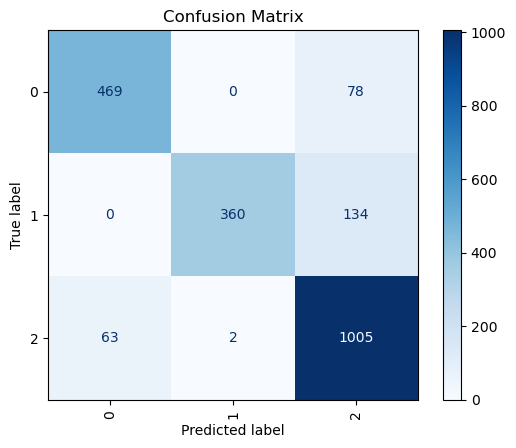

In [719]:
ConfusionMatrixDisplay.from_predictions(y_test, y_pred_test,
                                        display_labels=rf_classifier.classes_,
                                        cmap="Blues",
                                        xticks_rotation='vertical')
plt.title('Confusion Matrix')
plt.show()

3. Precision

In [720]:
precision_train = precision_score(y_train, y_pred_train, average='macro')
print(f"Precision in train: {precision_train:.2f}")

# Test score
precision_test = precision_score(y_test, y_pred_test, average='macro')
print(f"Precision in test: {precision_test:.2f}")

Precision in train: 0.92
Precision in test: 0.90


4. Recall

In [721]:
# Train score
recall_train = recall_score(y_train, y_pred_train, average='macro')
print(f"Recall in train: {recall_train:.2f}")

# Test score
recall_test = recall_score(y_test, y_pred_test, average='macro')
print(f"Recall in test: {recall_test:.2f}")

Recall in train: 0.86
Recall in test: 0.84


5. F1-Score

In [722]:
# Train score
f1_train = f1_score(y_train, y_pred_train, average='macro')
print(f"f1-score in train: {f1_train:.2f}")

# Test score
f1_test = precision_score(y_test, y_pred_test, average='macro')
print(f"f1-score in test: {f1_test:.2f}")

f1-score in train: 0.88
f1-score in test: 0.90


5. Classification Report

In [723]:
from sklearn.metrics import classification_report

print('Train report: ')
print(classification_report(y_train, y_pred_train))

print('Test report: ')
print(classification_report(y_test, y_pred_test))

Train report: 
              precision    recall  f1-score   support

           0       0.91      0.90      0.90      2127
           1       1.00      0.74      0.85      1914
           2       0.85      0.95      0.90      4401

    accuracy                           0.89      8442
   macro avg       0.92      0.86      0.88      8442
weighted avg       0.90      0.89      0.89      8442

Test report: 
              precision    recall  f1-score   support

           0       0.88      0.86      0.87       547
           1       0.99      0.73      0.84       494
           2       0.83      0.94      0.88      1070

    accuracy                           0.87      2111
   macro avg       0.90      0.84      0.86      2111
weighted avg       0.88      0.87      0.87      2111



## Support Vector Machine (SVM)

### With teams and positions

### Distribution of each category 

In [45]:
# reducing the rows of 2 and 0 classes to match the 1 class 
players_encoded['current_value_category_encoded'].value_counts()

current_value_category_encoded
2    5471
0    2674
1    2408
Name: count, dtype: int64

In [46]:
# Set the sample size to the smallest class count
sample_size = min(players_encoded['current_value_category_encoded'].value_counts())

# Randomly sample an equal number of rows from each class
balanced_df = players_encoded.groupby('current_value_category_encoded', group_keys=False).apply(lambda x: x.sample(sample_size))

print(balanced_df['current_value_category_encoded'].value_counts())  # Verify the balance

# If you want to shuffle the rows
balanced_df = balanced_df.sample(frac=1).reset_index(drop=True)

current_value_category_encoded
0    2408
1    2408
2    2408
Name: count, dtype: int64


In [47]:
print('Old shape:', players_encoded.shape)
print('current shape:', balanced_df.shape)

Old shape: (10553, 14)
current shape: (7224, 14)


In [48]:
# Set the sample size for each class
sample_per_class = 1000

# Randomly sample 1000 rows from each class
balanced_sample = balanced_df.groupby('current_value_category_encoded', group_keys=False).apply(lambda x: x.sample(n=sample_per_class, random_state=42))

# Shuffle the final dataset
balanced_sample = balanced_sample.sample(frac=1, random_state=42).reset_index(drop=True)

print(balanced_sample['current_value_category_encoded'].value_counts())
print(balanced_sample.shape)

current_value_category_encoded
1    1000
0    1000
2    1000
Name: count, dtype: int64
(3000, 14)


In [49]:
balanced_sample.columns

Index(['age', 'appearance', 'goals', 'assists', 'minutes played',
       'games_injured', 'award', 'highest_value', 'team_Arsenal FC',
       'team_Chelsea FC', 'team_Liverpool FC', 'team_Sevilla FC',
       'team_Southampton FC', 'current_value_category_encoded'],
      dtype='object')

### Preparing the training and testing sets

In [50]:
# Prepare data
X = balanced_sample.drop(['current_value_category_encoded'], axis=1)
y = balanced_sample['current_value_category_encoded']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.2,
                                                    shuffle=True,
                                                    random_state=42)

# sacle the data
scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

### Building the model

In [51]:
# Initializing the model
svm_classifier = SVC() 

In [52]:
param_grid = {
    'kernel': [
             # 'linear',
               'rbf',
             # 'poly'
              ],   # Regularization strength
    'C':[0, 2, 5, 10, 15, 20, 25],
    'gamma': [1,2,6]
}
grid_search = GridSearchCV(estimator=svm_classifier,
                           param_grid=param_grid,
                           cv=5,
                           scoring='f1_macro', 
                           verbose=1)

In [53]:
grid_search.fit(X_train_scaled, y_train)

Fitting 5 folds for each of 21 candidates, totalling 105 fits


C:\Users\sakur\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:547: FitFailedWarning: 
15 fits failed out of a total of 105.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
15 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\sakur\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 895, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\sakur\anaconda3\Lib\site-packages\sklearn\base.py", line 1467, in wrapper
    estimator._validate_params()
  File "C:\Users\sakur\anaconda3\Lib\site-packages\sklearn\base.py", line 666, in _validate_params
    validate_parameter_constraints(
  File "C:\Users\sakur\anaconda3\Lib\site-packages

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [0, 2, 5, 10, 15, 20, 25], 'gamma': [1, 2, 6],
                         'kernel': ['rbf']},
             scoring='f1_macro', verbose=1)

In [54]:
grid_search.best_params_

{'C': 20, 'gamma': 1, 'kernel': 'rbf'}

In [55]:
model = grid_search.best_estimator_

### Testing the model

In [56]:
y_pred = model.predict(X_test_scaled)

### Evaluating the model

1. Accuracy

In [57]:
accuracy = accuracy_score(y_test, y_pred)
accuracy

0.765

In [58]:
y_pred_train = model.predict(X_train_scaled)
accuracy = accuracy_score(y_train, y_pred_train)
accuracy

0.97125

2. Confusion Matrix

In [59]:
conf_matrix = confusion_matrix(y_test, y_pred)
conf_matrix

array([[210,   4,  18],
       [  9, 136,  38],
       [ 38,  34, 113]], dtype=int64)

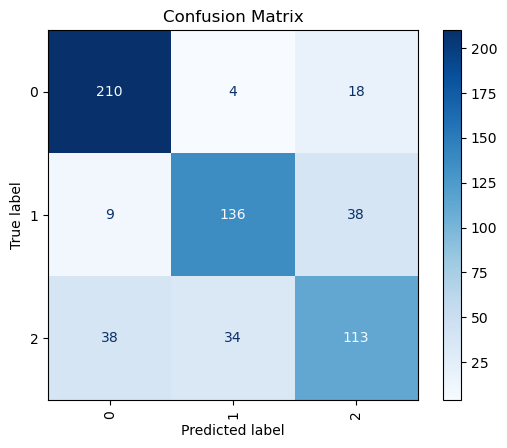

In [60]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_predictions(y_test, y_pred,
                                        display_labels=model.classes_,
                                        cmap="Blues",
                                        xticks_rotation='vertical')
plt.title('Confusion Matrix')
plt.show()

3. Precision

In [61]:
precision = precision_score(y_test, y_pred, average='macro')
print(f"Precision: {precision:.2f}")

Precision: 0.76


4. Recall

In [62]:
recall = recall_score(y_test, y_pred, average='macro')
print(f"Recall: {recall:.2f}")

Recall: 0.75


5. F1-Score

In [63]:
f1 = f1_score(y_test, y_pred, average='macro')
print(f"F1 Score: {f1:.2f}")

F1 Score: 0.75


In [64]:
print(classification_report(y_test,
                      y_pred,
                      labels=list(model.classes_)))

              precision    recall  f1-score   support

           0       0.82      0.91      0.86       232
           1       0.78      0.74      0.76       183
           2       0.67      0.61      0.64       185

    accuracy                           0.77       600
   macro avg       0.76      0.75      0.75       600
weighted avg       0.76      0.77      0.76       600



C:\Users\sakur\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


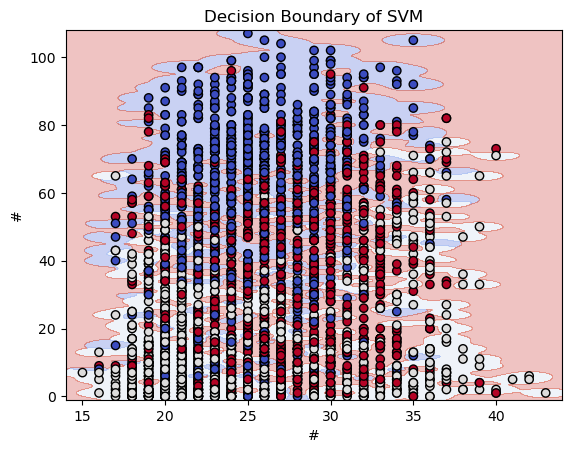

In [65]:
# Select two features from your dataset
X_two_features = X.iloc[:, [0, 1]]  # Replace with the indices of the two features you want to use

# Retrain your SVM model using these two features
model.fit(X_two_features, y)

# Now plot the decision boundary as before
h = .02  # Step size in the mesh
x_min, x_max = X_two_features.iloc[:, 0].min() - 1, X_two_features.iloc[:, 0].max() + 1
y_min, y_max = X_two_features.iloc[:, 1].min() - 1, X_two_features.iloc[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.contourf(xx, yy, Z, alpha=0.3, cmap=plt.cm.coolwarm)
plt.scatter(X_two_features.iloc[:, 0], X_two_features.iloc[:, 1], c=y, edgecolor='k', marker='o', cmap=plt.cm.coolwarm)
plt.xlabel('#')
plt.ylabel('#')
plt.title('Decision Boundary of SVM')
plt.show()

### without teams

### Distribution of each category 

In [67]:
# reducing the rows of 2 and 0 classes to match the 1 class 
players_no_team_encoded['current_value_category_encoded'].value_counts()

current_value_category_encoded
2    5471
0    2674
1    2408
Name: count, dtype: int64

In [68]:
# Set the sample size to the smallest class count
sample_size = min(players_no_team_encoded['current_value_category_encoded'].value_counts())

# Randomly sample an equal number of rows from each class
balanced_df = players_no_team_encoded.groupby('current_value_category_encoded', group_keys=False).apply(lambda x: x.sample(sample_size))

print(balanced_df['current_value_category_encoded'].value_counts())  # Verify the balance

# If you want to shuffle the rows
balanced_df = balanced_df.sample(frac=1).reset_index(drop=True)

current_value_category_encoded
0    2408
1    2408
2    2408
Name: count, dtype: int64


In [69]:
print('Old shape:', players_encoded.shape)
print('current shape:', balanced_df.shape)

Old shape: (10553, 14)
current shape: (7224, 9)


In [70]:
# Set the sample size for each class
sample_per_class = 1000

# Randomly sample 1000 rows from each class
balanced_sample = balanced_df.groupby('current_value_category_encoded', group_keys=False).apply(lambda x: x.sample(n=sample_per_class, random_state=42))

# Shuffle the final dataset
balanced_sample = balanced_sample.sample(frac=1, random_state=42).reset_index(drop=True)

print(balanced_sample['current_value_category_encoded'].value_counts())
print(balanced_sample.shape)

current_value_category_encoded
1    1000
0    1000
2    1000
Name: count, dtype: int64
(3000, 9)


In [71]:
balanced_sample.columns

Index(['age', 'appearance', 'goals', 'assists', 'minutes played',
       'games_injured', 'award', 'highest_value',
       'current_value_category_encoded'],
      dtype='object')

### Preparing the training and testing sets

In [72]:
# Prepare data
X = balanced_sample.drop(['current_value_category_encoded'], axis=1)
y = balanced_sample['current_value_category_encoded']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.2,
                                                    shuffle=True,
                                                    random_state=42)

# sacle the data
scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

### Building the model

In [73]:
# Initializing the model
svm_classifier = SVC() 

In [74]:
param_grid = {
    'kernel': [
             # 'linear',
               'rbf',
             # 'poly'
              ],   # Regularization strength
    'C':[0, 2, 5, 10, 15, 20, 25],
    'gamma': [1,2,6]
}
grid_search = GridSearchCV(estimator=svm_classifier,
                           param_grid=param_grid,
                           cv=5,
                           scoring='f1_macro', 
                           verbose=1)

In [75]:
grid_search.fit(X_train_scaled, y_train)

Fitting 5 folds for each of 21 candidates, totalling 105 fits


C:\Users\sakur\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:547: FitFailedWarning: 
15 fits failed out of a total of 105.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
15 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\sakur\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 895, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\sakur\anaconda3\Lib\site-packages\sklearn\base.py", line 1467, in wrapper
    estimator._validate_params()
  File "C:\Users\sakur\anaconda3\Lib\site-packages\sklearn\base.py", line 666, in _validate_params
    validate_parameter_constraints(
  File "C:\Users\sakur\anaconda3\Lib\site-packages

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [0, 2, 5, 10, 15, 20, 25], 'gamma': [1, 2, 6],
                         'kernel': ['rbf']},
             scoring='f1_macro', verbose=1)

In [76]:
grid_search.best_params_

{'C': 15, 'gamma': 1, 'kernel': 'rbf'}

In [77]:
model = grid_search.best_estimator_

### Testing the model

In [78]:
y_pred = model.predict(X_test_scaled)

### Evaluating the model

1. Accuracy

In [79]:
accuracy = accuracy_score(y_test, y_pred)
accuracy

0.7433333333333333

In [80]:
y_pred_train = model.predict(X_train_scaled)
accuracy = accuracy_score(y_train, y_pred_train)
accuracy

0.9691666666666666

2. Confusion Matrix

In [81]:
conf_matrix = confusion_matrix(y_test, y_pred)
conf_matrix

array([[194,   1,  37],
       [  5, 135,  43],
       [ 29,  39, 117]], dtype=int64)

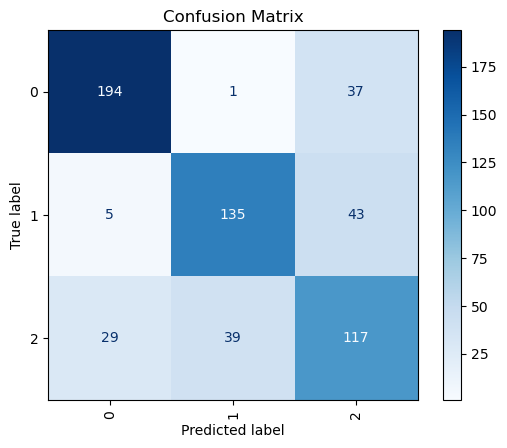

In [82]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_predictions(y_test, y_pred,
                                        display_labels=model.classes_,
                                        cmap="Blues",
                                        xticks_rotation='vertical')
plt.title('Confusion Matrix')
plt.show()

3. Precision

In [83]:
precision = precision_score(y_test, y_pred, average='macro')
print(f"Precision: {precision:.2f}")

Precision: 0.74


4. Recall

In [84]:
recall = recall_score(y_test, y_pred, average='macro')
print(f"Recall: {recall:.2f}")

Recall: 0.74


5. F1-Score

In [85]:
f1 = f1_score(y_test, y_pred, average='macro')
print(f"F1 Score: {f1:.2f}")

F1 Score: 0.74


In [86]:
print(classification_report(y_test,
                      y_pred,
                      labels=list(model.classes_)))

              precision    recall  f1-score   support

           0       0.85      0.84      0.84       232
           1       0.77      0.74      0.75       183
           2       0.59      0.63      0.61       185

    accuracy                           0.74       600
   macro avg       0.74      0.74      0.74       600
weighted avg       0.75      0.74      0.75       600



C:\Users\sakur\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


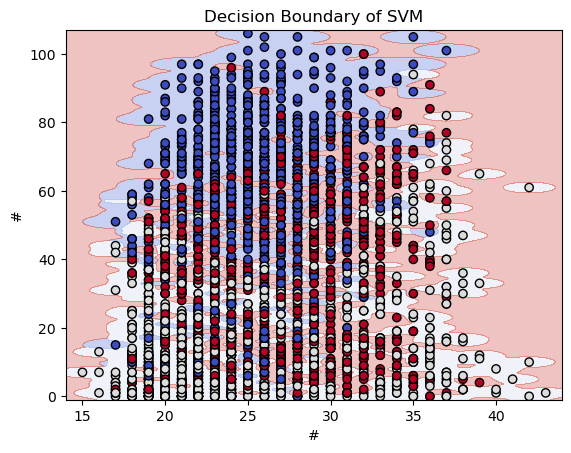

In [87]:
# Select two features from your dataset
X_two_features = X.iloc[:, [0, 1]]  # Replace with the indices of the two features you want to use

# Retrain your SVM model using these two features
model.fit(X_two_features, y)

# Now plot the decision boundary as before
h = .02  # Step size in the mesh
x_min, x_max = X_two_features.iloc[:, 0].min() - 1, X_two_features.iloc[:, 0].max() + 1
y_min, y_max = X_two_features.iloc[:, 1].min() - 1, X_two_features.iloc[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.contourf(xx, yy, Z, alpha=0.3, cmap=plt.cm.coolwarm)
plt.scatter(X_two_features.iloc[:, 0], X_two_features.iloc[:, 1], c=y, edgecolor='k', marker='o', cmap=plt.cm.coolwarm)
plt.xlabel('#')
plt.ylabel('#')
plt.title('Decision Boundary of SVM')
plt.show()

## KNN model

### With teams and positions

In [98]:
# Prepare data
X = players_encoded.drop(['current_value_category_encoded'], axis=1)
y = players_encoded['current_value_category_encoded']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.2,
                                                    shuffle=True,
                                                    random_state=42)

# sacle the data
scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [99]:
#initilaizing the model
KNN = KNeighborsClassifier()

In [102]:
param_grid = {
    'n_neighbors': [2, 3, 4, 5, 6, 7, 8, 9, 10],
    'metric': ['manhattan', 'nan_euclidean'] 
}

grid_search = GridSearchCV(estimator=KNN,
                           param_grid=param_grid,
                           cv=5,
                           scoring='f1_macro', 
                           verbose=1)

In [103]:
grid_search.fit(X_train_scaled, y_train)

Fitting 5 folds for each of 18 candidates, totalling 90 fits


GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'metric': ['manhattan', 'nan_euclidean'],
                         'n_neighbors': [2, 3, 4, 5, 6, 7, 8, 9, 10]},
             scoring='f1_macro', verbose=1)

In [104]:
grid_search.best_params_

{'metric': 'manhattan', 'n_neighbors': 8}

In [105]:
KNN = grid_search.best_estimator_

### Testing the model

In [107]:
y_pred = KNN.predict(X_test_scaled)

In [108]:
y_pred

array([1, 2, 2, ..., 2, 0, 0])

### Evaluating the model

1. Accuracy

In [110]:
# Train score
y_pred_train = KNN.predict(X_train_scaled)
accuracy = accuracy_score(y_train, y_pred_train)
accuracy

0.808576166785122

In [111]:
# Test score
accuracy = accuracy_score(y_test, y_pred)
accuracy

0.7394599715774515

2. Confusion Matrix

In [112]:
conf_matrix = confusion_matrix(y_test, y_pred)
conf_matrix

array([[398,   9, 140],
       [  0, 334, 160],
       [ 57, 184, 829]], dtype=int64)

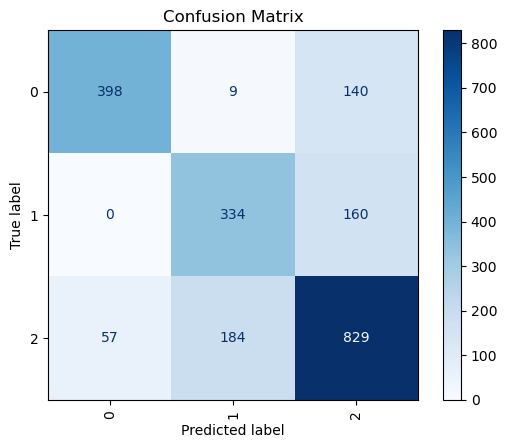

In [113]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_predictions(y_test, y_pred,
                                        display_labels=model.classes_,
                                        cmap="Blues",
                                        xticks_rotation='vertical')
plt.title('Confusion Matrix')
plt.show()

3. Precision

In [114]:
precision = precision_score(y_test, y_pred, average='macro')
print(f"Precision: {precision:.2f}")

Precision: 0.75


4. Recall 

In [115]:
recall = recall_score(y_test, y_pred, average='macro')
print(f"Recall: {recall:.2f}")

Recall: 0.73


5. F1-Score

In [116]:
f1 = f1_score(y_test, y_pred, average='macro')
print(f"F1 Score: {f1:.2f}")

F1 Score: 0.73


### Without teams

In [117]:
# Prepare data
X = players_no_team_encoded.drop(['current_value_category_encoded'], axis=1)
y = players_no_team_encoded['current_value_category_encoded']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.2,
                                                    shuffle=True,
                                                    random_state=42)

# sacle the data
scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [118]:
#initilaizing the model
KNN = KNeighborsClassifier()

In [119]:
param_grid = {
    'n_neighbors': [2, 3, 4, 5, 6, 7, 8, 9, 10],
    'metric': ['manhattan', 'nan_euclidean'] 
}

grid_search = GridSearchCV(estimator=KNN,
                           param_grid=param_grid,
                           cv=5,
                           scoring='f1_macro', 
                           verbose=1)

In [120]:
grid_search.fit(X_train_scaled, y_train)

Fitting 5 folds for each of 18 candidates, totalling 90 fits


GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'metric': ['manhattan', 'nan_euclidean'],
                         'n_neighbors': [2, 3, 4, 5, 6, 7, 8, 9, 10]},
             scoring='f1_macro', verbose=1)

In [121]:
grid_search.best_params_

{'metric': 'manhattan', 'n_neighbors': 8}

In [122]:
KNN = grid_search.best_estimator_

### Testing the model

In [123]:
y_pred = KNN.predict(X_test_scaled)

In [124]:
y_pred

array([1, 2, 2, ..., 2, 0, 0])

### Evaluating the model

1. Accuracy

In [125]:
# Train score
y_pred_train = KNN.predict(X_train_scaled)
accuracy = accuracy_score(y_train, y_pred_train)
accuracy

0.8081023454157783

In [126]:
# Test score
accuracy = accuracy_score(y_test, y_pred)
accuracy

0.7385125532922785

2. Confusion Matrix

In [127]:
conf_matrix = confusion_matrix(y_test, y_pred)
conf_matrix

array([[399,   9, 139],
       [  0, 334, 160],
       [ 59, 185, 826]], dtype=int64)

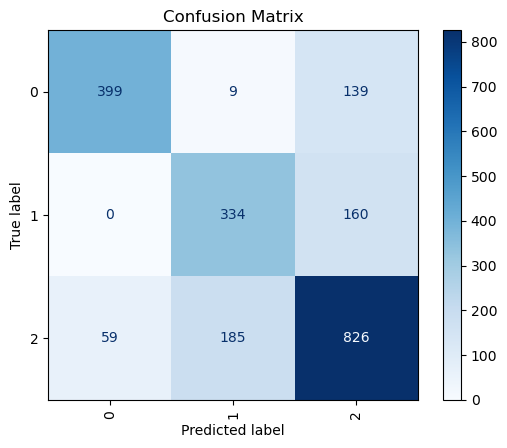

In [128]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_predictions(y_test, y_pred,
                                        display_labels=model.classes_,
                                        cmap="Blues",
                                        xticks_rotation='vertical')
plt.title('Confusion Matrix')
plt.show()

3. Precision

In [129]:
precision = precision_score(y_test, y_pred, average='macro')
print(f"Precision: {precision:.2f}")

Precision: 0.75


4. Recall 

In [130]:
recall = recall_score(y_test, y_pred, average='macro')
print(f"Recall: {recall:.2f}")

Recall: 0.73


5. F1-Score

In [131]:
f1 = f1_score(y_test, y_pred, average='macro')
print(f"F1 Score: {f1:.2f}")

F1 Score: 0.73


# Unsupervised Machine Learning

## K-Means Clustering

### With teams and positions

In [209]:
# Prepare data
X = players_encoded.drop(['current_value_category_encoded'], axis=1)


# sacle the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [318]:
wcss = []
for i in range(1, 25):  # Test 1 to 10 clusters
    # initializing the model
    kmeans = KMeans(n_clusters=i, 
                    init='k-means++',
                    max_iter=300,
                    n_init=10,
                    random_state=0)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)  # inertia_ is the WCSS

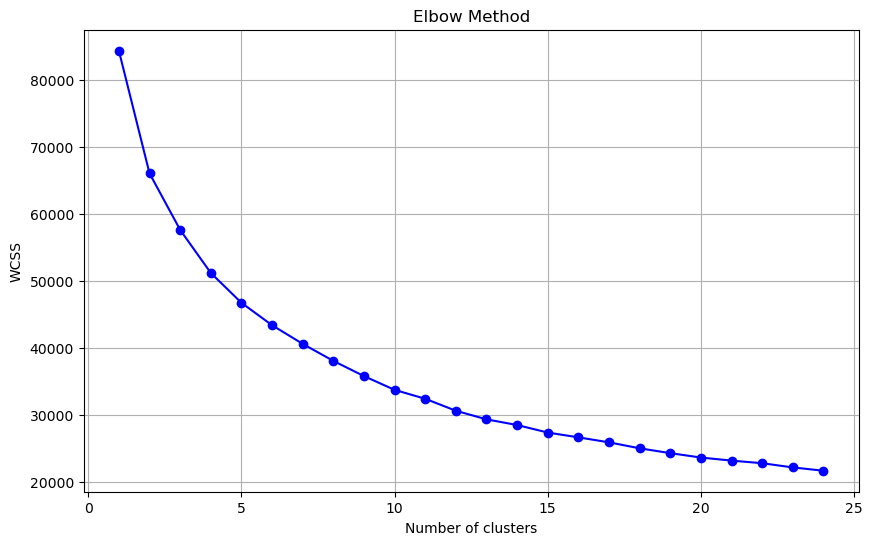

In [320]:
# 3. Plot the Elbow Curve
plt.figure(figsize=(10, 6))
plt.plot(range(1, 25), wcss,  marker='o', linestyle='-', color='b')
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.grid(True)
plt.show()

In [457]:
optimal_clusters = 5
model = KMeans(n_clusters=optimal_clusters, init='k-means++', max_iter=300, n_init=10, random_state=0)

#### Training and Testing the Model

In [458]:
y_pred = model.fit_predict(X_scaled)

In [459]:
y_pred

array([1, 0, 0, ..., 2, 2, 2])

#### Evaluating the Model

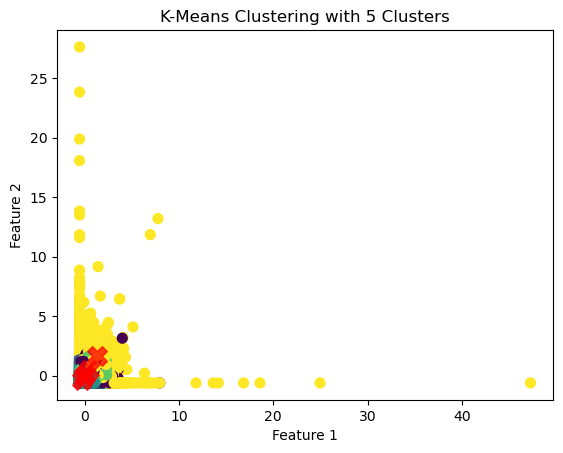

In [460]:
plt.scatter(X_scaled[:, 2], X_scaled[:, 3], c=y_pred, s=50, cmap='viridis')

centers = model.cluster_centers_
plt.scatter(centers[:, 2], centers[:, 3], c='red', s=200, alpha=0.75, marker='X')
plt.title(f'K-Means Clustering with {optimal_clusters} Clusters')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

In [461]:
X['kmeans'] = y_pred

In [462]:
X['kmeans'].value_counts()

kmeans
2    4313
3    3412
0    1552
4     907
1     369
Name: count, dtype: int64

In [463]:
X[X['kmeans']==0]

,age,appearance,goals,assists,minutes played,games_injured,award,highest_value,kmeans
1,30,15,0.000000,0.000000,1304,58,1,22000000.0,0
2,37,4,0.000000,0.000000,292,84,4,6000000.0,0
7,31,8,0.000000,0.000000,416,169,7,20000000.0,0
32,30,41,0.000000,0.000000,3606,4,16,17500000.0,0
33,38,75,0.000000,0.000000,6623,99,4,9000000.0,0
...,...,...,...,...,...,...,...,...,...
10732,33,50,0.000000,0.000000,4226,63,4,1500000.0,0
10736,33,36,0.107399,0.107399,1676,42,5,30000000.0,0
10741,34,33,0.265263,0.000000,2375,10,1,750000.0,0
10742,38,47,0.096222,0.256593,2806,13,13,5500000.0,0


In [ ]:
sns.scatterplot(data = X , x = 'age', y = 'appearance', hue = 'kmeans')

<Axes: xlabel='age', ylabel='appearance'>

In [452]:
players_encoded.columns

Index(['age', 'appearance', 'goals', 'assists', 'minutes played',
       'games_injured', 'award', 'highest_value', 'team_Arsenal FC',
       'team_Chelsea FC', 'team_Liverpool FC', 'team_Sevilla FC',
       'team_Southampton FC', 'current_value_category_encoded'],
      dtype='object')

<Axes: xlabel='age', ylabel='minutes played'>

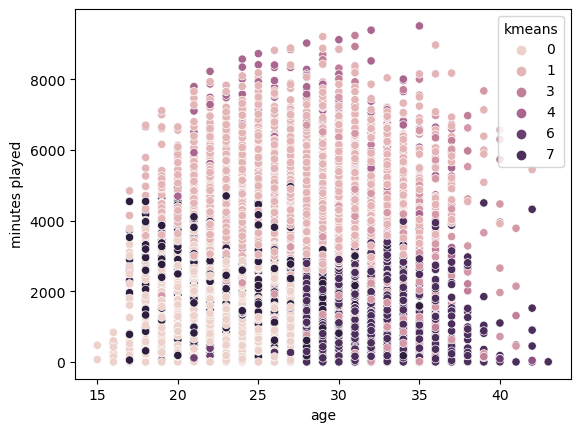

In [453]:
sns.scatterplot(data = X , x = 'age', y = 'minutes played', hue = 'kmeans')

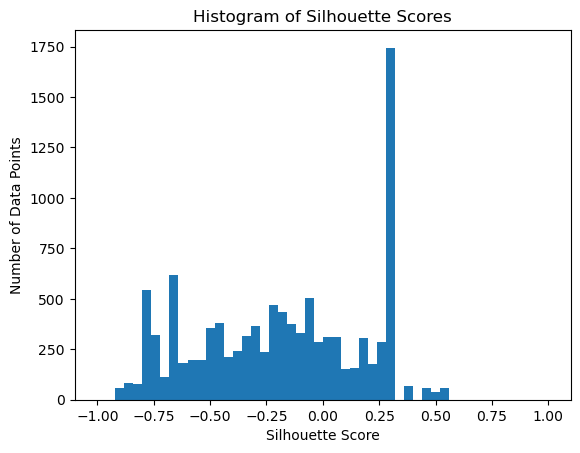

Silhouette average score: -0.18324660085980796


In [454]:
from sklearn.metrics import silhouette_samples, silhouette_score

# Calculate Silhouette scores for each data point
silhouette_scores = silhouette_samples(X, y_pred)

# Calculate Silhouette average score
silhouette_avg = silhouette_score(X, y_pred)

# Plot Silhouette scores
plt.hist(silhouette_scores, bins=50, range=(-1, 1))
plt.title('Histogram of Silhouette Scores')
plt.xlabel('Silhouette Score')
plt.ylabel('Number of Data Points')
plt.show()

print(f'Silhouette average score: {silhouette_avg}')

In [455]:
silhouette_scores

array([-0.08458819,  0.17344911, -0.31901798, ...,  0.29940018,
        0.2994031 ,  0.29549072])

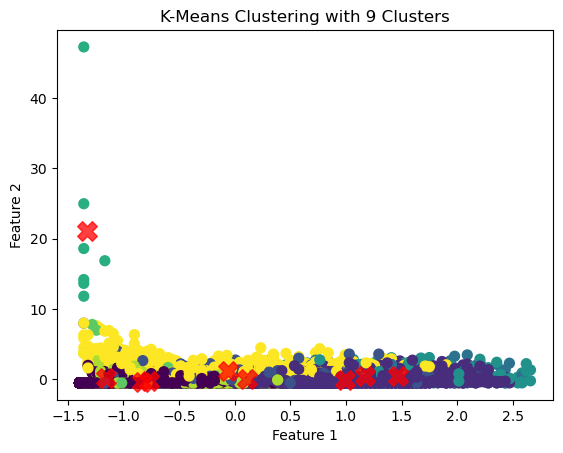

In [456]:
# Plotting the clusters with optimal number
plt.scatter(X_scaled[:, 1], X_scaled[:, 2], c=y_pred, s=50, cmap='viridis')

centers = model.cluster_centers_
plt.scatter(centers[:, 1], centers[:, 2], c='red', s=200, alpha=0.75, marker='X')
plt.title(f'K-Means Clustering with {optimal_clusters} Clusters')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

### Without teams

In [249]:
# Prepare data
X = players_no_team_encoded.drop(['current_value_category_encoded'], axis=1)


# sacle the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [316]:
wcss = []
for i in range(1, 25):  
    # initializing the model
    kmeans = KMeans(n_clusters=i, 
                    init='k-means++',
                    max_iter=500,
                    n_init=10,
                    random_state=0)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)  #

In [ ]:
# 3. Plot the Elbow Curve
plt.figure(figsize=(10, 6))
plt.plot(range(1, 25), wcss,  marker='o', linestyle='-', color='b')
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.grid(True)
plt.show()

In [301]:
optimal_clusters = 9
model = KMeans(n_clusters=optimal_clusters, init='k-means++', max_iter=300, n_init=10, random_state=0)

#### Training and Testing the Model

In [302]:
y_pred = model.fit_predict(X_scaled)

In [303]:
y_pred

array([4, 2, 2, ..., 0, 0, 0])

#### Evaluating the Model

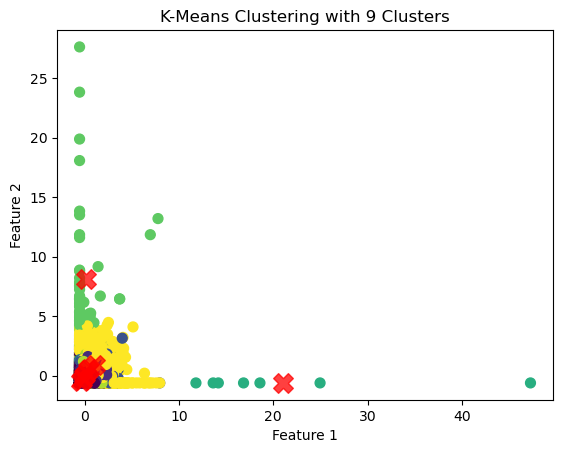

In [304]:
plt.scatter(X_scaled[:, 2], X_scaled[:, 3], c=y_pred, s=50, cmap='viridis')

centers = model.cluster_centers_
plt.scatter(centers[:, 2], centers[:, 3], c='red', s=200, alpha=0.75, marker='X')
plt.title(f'K-Means Clustering with {optimal_clusters} Clusters')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

In [305]:
X['kmeans'] = y_pred

In [306]:
X['kmeans'].value_counts()

kmeans
0    2927
1    2868
7    1700
8    1272
2    1061
4     543
3     122
6      53
5       7
Name: count, dtype: int64

In [307]:
X[X['kmeans']==0]

,age,appearance,goals,assists,minutes played,games_injured,award,highest_value,kmeans
8,21,34,0.000000,0.000000,2758,13,0,2000000.0,0
11,22,34,0.000000,0.033507,2686,28,1,12000000.0,0
20,20,39,0.129125,0.064562,2788,0,1,800000.0,0
28,21,34,0.000000,0.087379,1030,15,1,7000000.0,0
84,21,17,0.000000,0.000000,1530,10,0,400000.0,0
...,...,...,...,...,...,...,...,...,...
10748,22,32,0.226700,0.000000,1588,0,0,200000.0,0
10749,20,16,0.175953,0.087977,1023,0,0,75000.0,0
10751,19,20,0.375000,0.000000,960,0,0,50000.0,0
10752,20,17,0.312139,0.104046,865,0,0,50000.0,0


<Axes: xlabel='age', ylabel='appearance'>

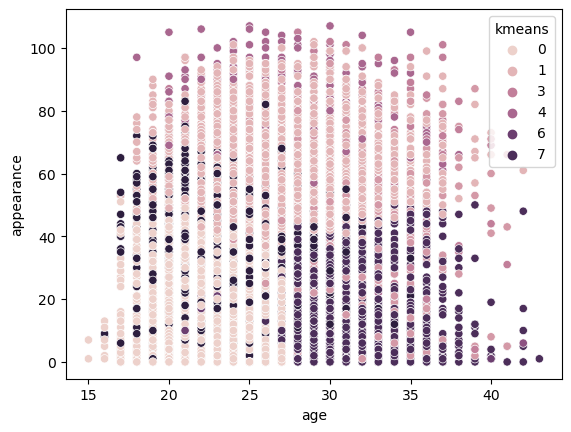

In [308]:
sns.scatterplot(data = X , x = 'age', y = 'appearance', hue = 'kmeans')

<Axes: xlabel='age', ylabel='highest_value'>

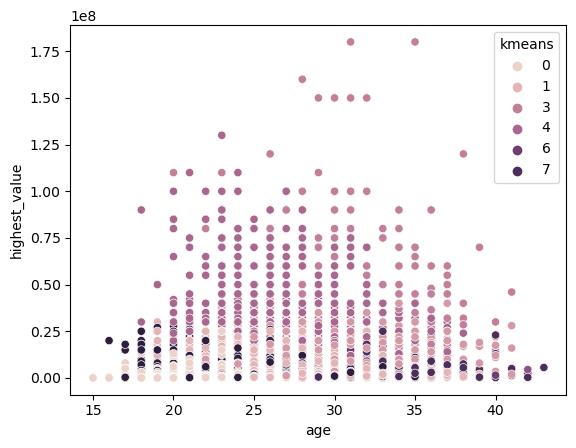

In [309]:
sns.scatterplot(data = X , x = 'age', y = 'highest_value', hue = 'kmeans')

<Axes: xlabel='appearance', ylabel='highest_value'>

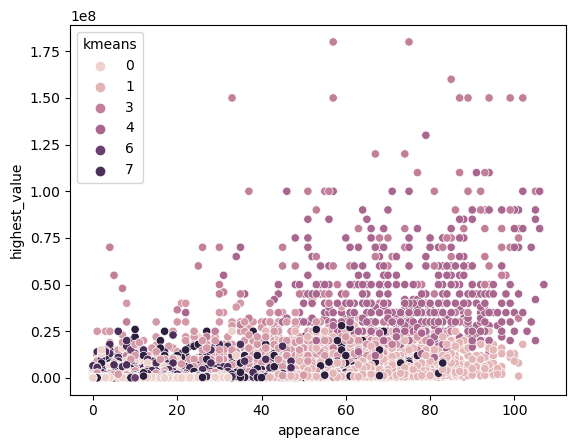

In [310]:
sns.scatterplot(data = X , x = 'appearance', y = 'highest_value', hue = 'kmeans')

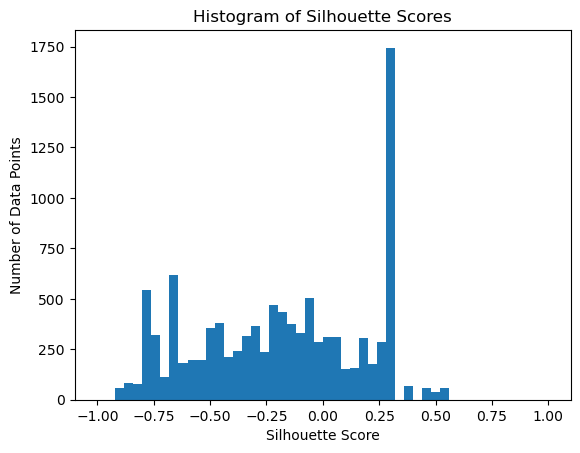

Silhouette average score: -0.18324660085980796


In [311]:
from sklearn.metrics import silhouette_samples, silhouette_score

# Calculate Silhouette scores for each data point
silhouette_scores = silhouette_samples(X, y_pred)

# Calculate Silhouette average score
silhouette_avg = silhouette_score(X, y_pred)

# Plot Silhouette scores
plt.hist(silhouette_scores, bins=50, range=(-1, 1))
plt.title('Histogram of Silhouette Scores')
plt.xlabel('Silhouette Score')
plt.ylabel('Number of Data Points')
plt.show()

print(f'Silhouette average score: {silhouette_avg}')

In [312]:
silhouette_scores

array([-0.08458819,  0.17344911, -0.31901798, ...,  0.29940018,
        0.2994031 ,  0.29549072])

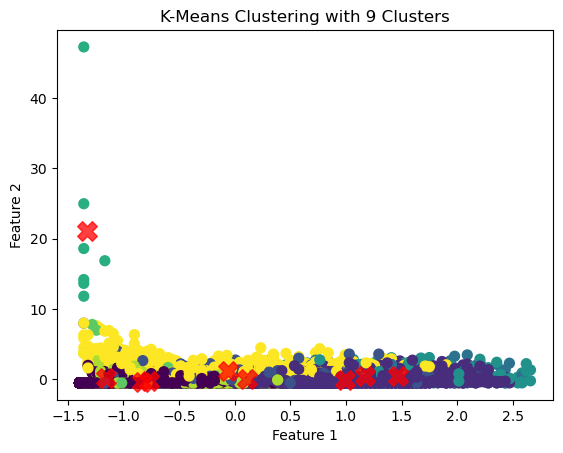

In [313]:
# Plotting the clusters with optimal number
plt.scatter(X_scaled[:, 1], X_scaled[:, 2], c=y_pred, s=50, cmap='viridis')

centers = model.cluster_centers_
plt.scatter(centers[:, 1], centers[:, 2], c='red', s=200, alpha=0.75, marker='X')
plt.title(f'K-Means Clustering with {optimal_clusters} Clusters')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()